# Table of contents



# I.Basic information

## I.1 Group information:

|Student ID| Name |
|----------|------|
|23127130|Nguyễn Hữu Anh Trí|
|23127051|Cao Tấn Hoàng Huy| 

## I.2 Libraries used:


In [2]:
import kagglehub
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
# Sử dụng trong handle missing
from sklearn.experimental import enable_iterative_imputer
from collections import defaultdict
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OrdinalEncoder

# Sử dụng trong unsupervise learning - câu 1
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# II. Data Collection

## II.1. What subject is your data about?
* **Describe the topic, domain, or phenomenon**
    
    The dataset covers **personal health indicators** and their relationship to heart disease. The domain encompasses **healthcare, epidemiology, and public health**. It includes relevant variables such as BMI, smoking habits, alcohol drinking, stroke history, physical health, and mental health status to determine risk factors for heart disease.
* **What real-world context does this represent?**
    
    This data represents the health status of the **adult population in the United States** based on the **2022 annual CDC survey**. It provides a real-world snapshot of public health, highlighting that heart disease is a leading cause of death across most races in the U.S.

## II.2. What is the source of your data?
* **Platform name (Kaggle, UCI, etc.) and full URL**
    * **Platform:** Kaggle
    * **URL:** [https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
* **Original author(s) or organization**
    The original data source is the **Centers for Disease Control and Prevention (CDC)**. The dataset was curated and uploaded to Kaggle by **Kamil Pytlak**.
* **Publication/collection date**
    The specific files selected for this project are from the **2022 update** (`heart_2022_no_nans.csv` or `heart_2022_with_nans.csv`), representing the **2022 annual survey**.

## II.3. Is this data licensed for your use?
* **What license does the dataset have?**
    
    The dataset is licensed under **CC0: Public Domain**.
* **Are you permitted to use it for educational purposes?**
    
    **Yes**, the Public Domain license allows for unrestricted use for educational, research, and commercial purposes.
* **Document any usage restrictions or attribution requirements**
    
    There are **no usage restrictions**. While attribution is not legally required by the license, standard academic practice requires citing the CDC and the Kaggle dataset provider.

## II.4. How was this data collected?
* **Collection method (survey, sensors, administrative records, web scraping, etc.)**
    
    The data was collected via **annual telephone surveys** conducted by the **Behavioral Risk Factor Surveillance System (BRFSS)**.
* **Target population and sampling approach**
    
    The target population is **adults (18+) in the United States**. The BRFSS collects data from all 50 states, the District of Columbia, and three U.S. territories(Guam, Puerto Rico, and the US Virgin Islands). This dataset includes over **400,000** adult interviews.
* **Time period of data collection**
    
    The data corresponds to the **2022** survey period.
* **Any known limitations or biases in collection**
    
    * **Class Imbalance:** The classes are unbalanced (significantly more "No" responses for heart disease than "Yes"), meaning standard model accuracy might be misleading without techniques like undersampling or weighting.
    * **Self-Reporting:** As a telephone survey, the data relies on self-reported information, which can be subject to recall bias.

## II.5. Why did you choose this dataset?
* **What interests your group about this topic?**
    
    Heart disease is a critical public health issue and a leading cause of death. We are interested in applying machine learning to see if we can detect patterns in lifestyle and health factors (like high blood pressure, cholesterol, and smoking) that predict a patient's condition.
* **What potential questions or insights could this data provide?**
    
    * Can we accurately predict the likelihood of heart disease based on the 40 selected variables?
    * Which factors (e.g., BMI vs. Smoking) have the most significant effect on heart disease risk?
    * How do machine learning models perform on unbalanced medical data?
    * What is the age group that is most likely to have heart disease across different states?  

## II.6. Dataset download method and instructions

### Libraries requirements:

If you haven't installed the required libraries, run these commands in your terminal or a separate notebook cell:

```bash
pip install kagglehub pandas
```

### Customization option

- **Change the target folder**: Modify the `target_folder` variable to your preferred location
- **Relative vs Absolute paths**: 
  - `"./my_heart_disease_data"` - creates folder in current directory
  - `"../data/heart_disease"` - creates folder in parent directory
  - `"C:/Users/YourName/Documents/heart_data"` - absolute path (Windows)
  - `"/home/username/projects/heart_data"` - absolute path (Linux/Mac)

In [4]:
cache_path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

target_folder = "./my_heart_disease_data"
os.makedirs(target_folder, exist_ok=True)
shutil.copytree(cache_path, target_folder, dirs_exist_ok=True)

print(f"Dataset files are now available in: {target_folder}")
print(os.listdir(target_folder))

Dataset files are now available in: ./my_heart_disease_data
['2020', '2022']


### File structure after download

The dataset has been organized into the following directory structure:

```
[target_folder] (In this case is: my_heart_disease_data)/
├── 2020/
│   └── heart_2020_cleaned.csv
└── 2022/
    ├── heart_2022_no_nans.csv
    └── heart_2022_with_nans.csv
```

### Dataset files description

| File | Description | Use Case |
|------|-------------|----------|
| **`heart_2020_cleaned.csv`** | 2020 CDC survey data, pre-cleaned | Good for historicaldcomparison and baseline analysis |
| **`heart_2022_no_nans.csv`** | 2022 CDC survey data with missing values removed | Ready for immediate analysis, smaller dataset |
| **`heart_2022_with_nans.csv`** | 2022 CDC survey data with original missing values intact | Best for comprehensive analysis and missing data handling strategies |

### Dataset choosen:

For this project, we are using **`heart_2022_with_nans.csv`** because:
- Contains the most recent data (2022)
- Preserves original data integrity (includes missing values)
- Allows us to implement and demonstrate proper missing data handling techniques
- Provides more comprehensive dataset for analysis

# III. Data Exploration

## III.1. Basic information of the dataset

In [3]:
df = pd.read_csv("my_heart_disease_data/2022/heart_2022_with_nans.csv")

### How many rows does your dataset have?

In [ ]:
num_rows = len(df)
print(f"Number of rows: {num_rows:,}")

### How many columns does your dataset have?

In [ ]:
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

### What does each row represent?
- Each rows represents: One individual survey respondent from the 2022 CDC BRFSS survey
- Each record contains Demographics, Lifestyle Factors, and Clinical Health History of an individual

### What is the overall size of the dataset? 

In [ ]:
dataset_size_cells = df.size
memory_usage_bytes = df.memory_usage(deep=True).sum()
memory_usage_mb = memory_usage_bytes / (1024 * 1024)

print(f"Dataset dimensions: {num_rows:,} rows × {num_columns} columns")
print(f"Total data points: {dataset_size_cells:,} cells")
print(f"Memory usage: {memory_usage_mb:.2f} MB")

### What are the column names?

In [ ]:
print("All column names in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

## III.2 Data integrity

### Are there any duplicated rows? If yes, how many?

In [ ]:
print(f"Total rows in dataset: {len(df):,}")
print(f"Duplicate rows found: {df.duplicated().sum():,}")
print(f"Percentage of duplicates: {(df.duplicated().sum() / len(df)) * 100:.2f}%")

Total rows in dataset: 445,132
Duplicate rows found: 157
Percentage of duplicates: 0.04%


### Should duplicates be kept or removed? (Justify your decision) 
&rarr; They should be removed. Because in this dataset there're many specific columns (40 distinct variables) with very personal data, it is highly unlikely that two different people would have the exact same answer for every single question.

Therefore, a duplicate row is almost certainly a data processing error (the same person recorded twice). **If** we keep the duplicate rows, this would biases the results, artificially inflating the statistics which will make our analysis less accurate.

In [ ]:
print(f"\nRemove duplicates rows")
df = df.drop_duplicates()
print(f"Duplicates removed. New dataset has {len(df):,} rows.")

### Are all rows complete or some entirely empty?

In [ ]:
# Check for completely empty rows
print(f"Completely empty rows: {df.isnull().all(axis=1).sum():,}")

missing_per_row = df.isnull().sum(axis=1)
rows_with_missing = (missing_per_row > 0).sum()
percentage_rows_with_missing = (rows_with_missing / len(df)) * 100

print(f"Rows with at least one missing value: {rows_with_missing:,}")
print(f"Percentage of rows with missing data: {percentage_rows_with_missing:.2f}%")

## III.3 Column Inventory 


### What is the meaning/definition of each columns?
We can categorize 40 columns into 7 main groups:
- **Group 1** *Demographics and basic information*:
    - **State**: US State where survey was conducted - Geographic identifier
    - **Sex**: Gender of respondent (Male/Female) - Demographic variable  
    - **AgeCategory**: Age group categories (e.g., 18-24, 25-29, etc.) - Key demographic
    - **RaceEthnicityCategory**: Race and ethnicity classification - Demographic variable

- **Group 2** *Related heart conditions*:
    - **HadHeartAttack**: Whether respondent ever had heart attack - PRIMARY OUTCOME
    - **HadAngina**: History of angina (chest pain) - Related heart condition
    - **HadStroke**: History of stroke - Cardiovascular risk factor

- **Group 3** *Physical health metrics*:
    - **GeneralHealth**: Self-reported overall health status - Key health indicator
    - **PhysicalHealthDays**: Days of poor physical health in past 30 days - Health quality measure
    - **MentalHealthDays**: Days of poor mental health in past 30 days - Mental health indicator
    - **BMI**: Body Mass Index (calculated) - Key obesity/health metric
    - **HeightInMeters**: Height measurement - Used for BMI calculation
    - **WeightInKilograms**: Weight measurement - Used for BMI calculation

- **Group 4** *Chronic conditions*
    - **HadAsthma**: History of asthma - Respiratory condition
    - **HadSkinCancer**: History of skin cancer - Cancer indicator
    - **HadCOPD**: Chronic Obstructive Pulmonary Disease - Respiratory condition
    - **HadDepressiveDisorder**: History of depression - Mental health condition
    - **HadKidneyDisease**: History of kidney disease - Chronic condition
    - **HadArthritis**: History of arthritis - Joint/inflammatory condition
    - **HadDiabetes**: Diabetes status - Major metabolic risk factor

- **Group5** *Disabilities and limitations*:
    - **DeafOrHardOfHearing**: Hearing impairment status - Disability indicator
    - **BlindOrVisionDifficulty**: Vision impairment status - Disability indicator
    - **DifficultyConcentrating**: Cognitive difficulties - Functional limitation
    - **DifficultyWalking**: Mobility limitations - Physical disability
    - **DifficultyDressingBathing**: Self-care limitations - Functional disability
    - **DifficultyErrands**: Difficulty with errands/shopping - Functional limitation

- **Group 6** *Lifestyle and behaviours*
    - **SmokerStatus**: Smoking history/status - Major cardiovascular risk factor
    - **ECigaretteUsage**: Electronic cigarette usage - Modern smoking behavior
    - **AlcoholDrinkers**: Alcohol consumption status - Lifestyle risk factor
    - **PhysicalActivities**: Regular physical activity participation - Protective factor
    - **SleepHours**: Average hours of sleep per day - Lifestyle factor

- **Group 7** *Healthcare and preventions*:
    - **LastCheckupTime**: Time since last medical checkup - Healthcare access indicator
    - **RemovedTeeth**: Number of teeth removed - Oral health/overall health indicator
    - **ChestScan**: Recent chest scan/X-ray - Healthcare utilization
    - **HIVTesting**: HIV testing history - Preventive healthcare behavior
    - **FluVaxLast12**: Flu vaccination in last 12 months - Preventive care
    - **PneumoVaxEver**: Ever received pneumonia vaccine - Preventive care
    - **TetanusLast10Tdap**: Tetanus vaccination status - Preventive care
    - **HighRiskLastYear**: High-risk behavior in last year - Risk assessment
    - **CovidPos**: COVID-19 positive status - Recent health event

### Which columns are relevant to potential analysis? 

- We can have some important columns due to some categories:
    - Relevant heart-disease factors: `HadHeartAttack, HadAngina, HadStroke, HadDiabetes, HadAsthma` 
    - Key health indicators:  `GeneralHealth, BMI, SmokerStatus, PhysicalActivities`
    - Important demographic: `AgeCategory, Sex, State, RaceEthnicityCategory`
    - Relevant conditions: `HadCOPD, HadKidneyDisease, PhysicalHealthDays`
    - Lifestyle factors: `AlcoholDrinkers, SleepHours, MentalHealthDays, LastCheckupTime, SmokerStatus`
    - Physical limitations: `DifficultyWalking, DifficultyErrands`
    - Recent pandemic: `CovidPos` 

### Are there any columns that should be dropped? Why? 

| Category | Columns | Reason | Recommendation |
|----------|---------|--------|----------------|
| **Redudant features** | HeightInMeters, WeightInKilograms | BMI is already calculated from these values | DROP - Keep BMI only |
| **Preventive care (Low signal)** | FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap| Vaccination status has weak connection to heart disease | Consider DROPPING - Low predictive value |
| **Highly specific disabilities** | BlindOrVisionDifficulty, DeafOrHardOfHearin | Very specific conditions with indirect heart disease connection | Consider DROPPING - Unless studying comorbidity patterns |
| **Oral health(Indirect)** | HIVTesting, CovidPos, RemovedTeeth | While extreme gum disease or viral inflammation can stress the heart, these specific variables are likely too weak or unrelated to be useful | Consider DROPPING - Indirect indicator |



Ở dưới bọn em muốn phân tích thêm những giá trị này để có thêm insight thú vị - Tuy nhiên ở phần handle missing, bọn em sẽ bắt đầu drop - để có thể tiến hành preprocessing

## III.4 Data types: 

### What is the current data type of each column? 

In [ ]:
df.info()

### Are there columns with inappropriate data types?  


In [ ]:
# Categorize columns by their expected vs actual types
categorical_expected = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
    'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
    'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting',
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

numerical_expected = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters',
    'WeightInKilograms', 'BMI'
]

print("Checking for type mismatches:")

# Vectorized approach: Get all dtypes at once
all_dtypes = df.dtypes
type_issues = []

# CATEGORICAL COLUMNS ANALYSIS (Vectorized)
print(f"\n Categorical Columns (Expected: object/string):")
cat_cols_present = [col for col in categorical_expected if col in df.columns]
if cat_cols_present:
    # Get dtypes for all categorical columns at once
    cat_dtypes = all_dtypes[cat_cols_present]
    cat_analysis = pd.DataFrame({
        'column': cat_cols_present,
        'dtype': cat_dtypes.astype(str),
        'is_object': cat_dtypes == 'object'
    })
    
    # Display results
    for _, row in cat_analysis.iterrows():
        status = "CORRECT" if row['is_object'] else f"ISSUE: {row['dtype']}"
        print(f"   {row['column']:<30} {row['dtype']:<15} {status}")
        
        if not row['is_object']:
            type_issues.append({
                'column': row['column'],
                'current_type': row['dtype'],
                'expected_type': 'object/categorical',
                'issue': 'Should be categorical/string type'
            })

# NUMERICAL COLUMNS ANALYSIS (Vectorized)
print(f"\n Numerical columns (Expected: int64/float64):")
num_cols_present = [col for col in numerical_expected if col in df.columns]
if num_cols_present:
    # Get dtypes for all numerical columns at once
    num_dtypes = all_dtypes[num_cols_present]
    numeric_types = ['int64', 'float64', 'int32', 'float32']
    num_analysis = pd.DataFrame({
        'column': num_cols_present,
        'dtype': num_dtypes.astype(str),
        'is_numeric': num_dtypes.astype(str).isin(numeric_types)
    })
    
    # Display results
    for _, row in num_analysis.iterrows():
        status = "CORRECT" if row['is_numeric'] else f"ISSUE: {row['dtype']}"
        print(f"   {row['column']:<30} {row['dtype']:<15} {status}")
        
        if not row['is_numeric']:
            type_issues.append({
                'column': row['column'],
                'current_type': row['dtype'],
                'expected_type': 'numeric (int64/float64)',
                'issue': 'Should be numeric type'
            })

# BINARY VARIABLES ANALYSIS (Vectorized)
print(f"\nBinary variables analysis:")
# Filter categorical columns that exist in dataframe
cat_cols_in_df = [col for col in categorical_expected if col in df.columns]

# Vectorized unique value counting
binary_analysis = pd.DataFrame({
    'column': cat_cols_in_df,
    'nunique': [df[col].dropna().nunique() for col in cat_cols_in_df]
})
binary_cols = binary_analysis[binary_analysis['nunique'] == 2]['column'].tolist()

# Check binary patterns vectorized
binary_candidates = []
yes_no_patterns = {'yes', 'no', 'true', 'false', '1', '0'}

for col in binary_cols:
    unique_vals = df[col].dropna().unique()
    if set(str(v).lower() for v in unique_vals) <= yes_no_patterns:
        binary_candidates.append(col)
        print(f" {col}: Binary variable with values {unique_vals} - Could be converted to boolean")

# NUMERIC DATA STORED AS OBJECTS (Vectorized)
print(f"\nChecking for numeric data stored as objects:")
# Get all object columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()

# Vectorized numeric detection
numeric_as_object = []
for col in object_cols:
    sample_data = df[col].dropna().head(100)
    if len(sample_data) > 0:
        # Try converting entire sample at once
        try:
            pd.to_numeric(sample_data, errors='raise')
            numeric_as_object.append(col)
            print(f"   {col}: Stored as object but appears to be numeric")
        except (ValueError, TypeError):
            pass  # It's truly categorical

# SUMMARY (Using pandas operations)
summary_conditions = [
    len(type_issues) > 0,
    len(numeric_as_object) > 0, 
    len(binary_candidates) > 0
]

if any(summary_conditions):
    print(f"\n Inappropriate data types summary:")
    
    if type_issues:
        print(f"   • Columns with wrong data types: {len(type_issues)}")
        # Using list comprehension instead of loop
        issues_formatted = [f"     - {issue['column']}: {issue['current_type']} should be {issue['expected_type']}" 
                           for issue in type_issues]
        print('\n'.join(issues_formatted))
    
    if numeric_as_object:
        print(f"   • Numeric columns stored as objects: {len(numeric_as_object)}")
        # Using list comprehension and join
        numeric_formatted = [f"     - {col}: Should be converted to numeric" for col in numeric_as_object]
        print('\n'.join(numeric_formatted))
    
    if binary_candidates:
        print(f"   • Binary variables that could be boolean: {len(binary_candidates)}")
        # Using list comprehension and join
        binary_formatted = [f"     - {col}: Could be converted to boolean for efficiency" for col in binary_candidates]
        print('\n'.join(binary_formatted))
else:
    print(f"\n No inappropriate data types detected")
    print("   All columns appear to have appropriate data types for their content")

### Which columns need type conversion? 


| Column | From | To |
| :--- | :--- | :--- |
| PhysicalActivities | object | bool |
| HadHeartAttack | object | bool |
| HadAngina | object | bool |
| HadStroke | object | bool |
| HadAsthma | object | bool |
| HadSkinCancer | object | bool |
| HadCOPD | object | bool |
| HadDepressiveDisorder | object | bool |
| HadKidneyDisease | object | bool |
| HadArthritis | object | bool |
| DeafOrHardOfHearing | object | bool |
| BlindOrVisionDifficulty | object | bool |
| DifficultyConcentrating | object | bool |
| DifficultyWalking | object | bool |
| DifficultyDressingBathing | object | bool |
| DifficultyErrands | object | bool |
| ChestScan | object | bool |
| AlcoholDrinkers | object | bool |
| HIVTesting | object | bool |
| FluVaxLast12 | object | bool |
| PneumoVaxEver | object | bool |
| HighRiskLastYear | object | bool |
| State | object | category |
| Sex | object | category |
| GeneralHealth | object | category |
| LastCheckupTime | object | category |
| PhysicalActivities | object | category |

&rarr; Regarding that the action of converting them is not yet neccessary and possibly lead to some difficulties when doing the Data Exploration (For instance: If we convert **Sex** or **State** to a vector `0` and `1` by `One-hot encoding`, there will be more charts or we have to merge them again); so we will convert them later in the Preprocessing process.

Ghi thêm 2 biến hút thuốc và thêm 1 biến diabetie

## III.5 Numerical column analysis

### Find all numerical columns

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical columns detected: {numerical_columns}")

### Distribution & Central Tendency: 

In [ ]:
df_numerical = df[numerical_columns]
df_numerical_des = df_numerical.describe()

#### Trực quan hóa dữ : histograms, box plots, density plots,... 

* **Vẽ biểu đồ Histogram** (kèm đường KDE): để minh họa sự phân phối của từng cột dữ liệu, sau đó lưu lại hình dáng phân phối đó vào một DataFrame và hiển thị nó ở cuối phần này.

* **Lưu trữ hình dáng phân phối**: để hiển thị danh sách tất cả các đặc trưng (features) sau khi đã hoàn tất việc trực quan hóa dữ liệu.

In [ ]:
n_cols = 2
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  
distribution_shapes = {}

for i, col in enumerate(numerical_columns):
    # Setup Data
    data = df[col].dropna()
    
    
    if len(data) == 0:
        fig.delaxes(axes[i]) 
        continue
    
    # Calculate Skewness
    skew_val = data.skew()
    
    # Determine Shape String
    if skew_val > 1:
        shape_desc = "Highly right-skewed"
    elif skew_val < -1:
        shape_desc = "Highly left-skewed"
    elif 0.5 < skew_val <= 1:
        shape_desc = "Moderately right-skewed"
    elif -1 <= skew_val < -0.5:
        shape_desc = "Moderately left-skewed"
    else:
        shape_desc = "Approximately Symmetric"
    
    # Lưu vào dictionary
    distribution_shapes[col] = shape_desc
    
    ax = axes[i]  # Lấy subplot hiện tại
    
    is_discrete = data.nunique() <= 50
    
    if is_discrete:
        # For discrete data: set ax=ax
        sns.histplot(data, stat="density", discrete=True, color='skyblue', alpha=0.6, kde=False, edgecolor='white', ax=ax)
        sns.kdeplot(data, color='red', linewidth=2, bw_adjust=2.0, ax=ax)
    else:
        # For continuous data: set ax=ax
        sns.histplot(data, stat="density", bins=30, color='skyblue', alpha=0.6, kde=False, edgecolor='white', ax=ax)
        sns.kdeplot(data, color='red', linewidth=2, ax=ax)
    
    ax.set_title(f'Distribution of {col}\n(Skewness: {skew_val:.2f} - {shape_desc})', fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

df_numerical_des.loc['dis_shape'] = pd.Series(distribution_shapes)


### 🔍 **PHÂN TÍCH CỤ THỂ TỪNG BIẾN:**

#### 1. **PhysicalHealthDays** (Ngày sức khỏe thể chất kém - Skewness: 2.18)
- **LỆCH PHẢI MẠNH**: Phần lớn người tham gia khảo sát có 0 ngày bị ảnh hưởng sức khỏe thể chất
- **Phát hiện tích cực**: ~60% mẫu có sức khỏe thể chất tốt (0 ngày ốm)
- **Nhóm nguy cơ cao**: Có một số ít người báo cáo 30 ngày liên tục ảnh hưởng sức khỏe
- **Ý nghĩa y tế**: Đây là dấu hiệu tích cực cho sức khỏe cộng đồng

#### 2. **MentalHealthDays** (Ngày sức khỏe tinh thần kém - Skewness: 2.12)  
- **Tương tự PhysicalHealthDays**: Hầu hết người tham gia có sức khỏe tinh thần tốt
- **Điểm đáng chú ý**: Tỷ lệ 0 ngày ảnh hưởng cũng rất cao (~60%)
- **Outliers**: Vẫn có nhóm nhỏ gặp vấn đề sức khỏe tinh thần nghiêm trọng
- **Correlation tiềm năng**: Có thể có mối liên hệ với sức khỏe tim mạch

#### 3. **SleepHours** (Giờ ngủ - Skewness: 0.76)
- **🎯 PHÂN PHỐI GẦN CHUẨN**: Lệch phải vừa phải, tập trung quanh 6-8 giờ
- **Peak**: Phần lớn ngủ 7-8 giờ/đêm (khuyến nghị y tế)
- **Vấn đề**: Có nhóm ngủ ít (<6h) và nhóm ngủ quá nhiều (>9h)
- **Risk factor**: Cả thiếu ngủ và ngủ quá đều liên quan đến bệnh tim

#### 4. **HeightInMeters** (Chiều cao - Skewness: 0.03)
- **⚖️ PHÂN PHỐI ĐỐI XỨNG HOÀN HẢO**: Gần như phân phối chuẩn
- **Tập trung**: 1.6-1.8m (phù hợp với dân số trưởng thành)
- **Không có outliers**: Dữ liệu sạch và đáng tin cậy
- **Ý nghĩa**: Biến này ổn định cho việc tính BMI

#### 5. **WeightInKilograms** (Cân nặng - Skewness: 1.08)
- **📈 LỆC H PHẢI MẠNH**: Nhiều người có cân nặng bình thường, ít người béo phì nặng
- **Phân bố**: Tập trung 60-90kg, có "tail" kéo dài tới 150kg+
- **Obesity concern**: Những outliers trên 120kg cần được quan tâm đặc biệt
- **BMI implication**: Sẽ ảnh hưởng đến phân phối BMI

#### 6. **BMI** (Chỉ số khối cơ thể - Skewness: 1.39)
- **🔴 LỆC H PHẢI MẠNH**: Kế thừa từ phân phối cân nặng
- **Phân loại**:
  - Phần lớn: 20-30 (bình thường đến thừa cân nhẹ)
  - Outliers: >40 (béo phì nghiêm trọng)
- **Nguy cơ tim mạch**: BMI cao là risk factor chính của bệnh tim
- **Cần can thiệp**: Nhóm BMI >35 cần được theo dõi đặc biệt

---

### 💡 **KẾT LUẬN VÀ KHUYẾN NGHỊ:**

#### ✅ **Điểm tích cực:**
- Phần lớn mẫu có sức khỏe thể chất và tinh thần tốt
- Thời gian ngủ khá hợp lý ở đa số người
- Chiều cao phân phối chuẩn, dữ liệu chất lượng

#### ⚠️ **Điểm cần chú ý:**
- **Outliers nghiêm trọng** ở BMI và cân nặng → Nguy cơ tim mạch cao
- **Nhóm thiếu ngủ/ngủ quá** có thể tăng nguy cơ
- Cần **phân tích sâu hơn** mối quan hệ giữa các biến

#### 📋 **Bước tiếp theo:**
1. **Xử lý outliers**: Xem xét loại bỏ hoặc transform BMI >50
2. **Phân nhóm**: Tạo categorical variables (Normal/Overweight/Obese)  
3. **Correlation analysis**: Tìm mối liên hệ giữa BMI, sleep và heart disease
4. **Feature engineering**: Tạo risk scores dựa trên multiple factors

In [ ]:
n_cols = 2 
n_rows = math.ceil(len(numerical_columns) / n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    
    # Setup Data
    data = df[col].dropna()
    
    if len(data) == 0:
        ax.text(0.5, 0.5, "No Data", ha='center', va='center')
        continue
        
    sns.boxplot(x=data, ax=ax, color='lightgreen', width=0.5)
    
    ax.set_title(f'Box Plot of {col}', fontsize=11)
    ax.set_xlabel(col)

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- What is the distribution shape? (normal, skewed, bimodal, uniform) 
- Calculate: mean, median, standard deviation 

In [ ]:
df_numerical_des

### Range & Outliers: 
- What are the minimum and maximum values? 
- Are min/max values reasonable, or do they indicate errors? 
- Identify outliers using box plots, IQR method, or z-scores 
- Are outliers genuine extreme values or data entry errorissing

In [ ]:
REAL_LIFE_LIMITS = {
    'PhysicalHealthDays': (0, 30, "days/month"),
    'MentalHealthDays':   (0, 30, "days/month"),
    'SleepHours':         (1, 24, "hours/day"),
    'HeightInMeters':     (0.5, 2.8, "meters"),
    'WeightInKilograms':  (25, 640, "kg"),
    'BMI':                (10, 150, "index")
}

summary_rows = []

for col in numerical_columns:
    data = df[col].dropna()
    if len(data) == 0:
        continue

    min_val = data.min()
    max_val = data.max()
    

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    low_outliers = data[data < lower_bound]
    high_outliers = data[data > upper_bound]
    total_outliers = len(low_outliers) + len(high_outliers)
    pct_outliers = (total_outliers / len(data)) * 100
    
    limit_info = REAL_LIFE_LIMITS.get(col)
    
    verdict = "Normal Distribution" # Mặc định
    note = ""
    
    if len(high_outliers) > 0:
        if limit_info:
            real_min, real_max, unit = limit_info
            
            # Logic so sánh với giới hạn thực tế
            if max_val <= real_max:
                verdict = "Genuine Extreme"
                note = f"High statistical outliers but within real limit ({real_max} {unit})"
            else:
                verdict = "Data Error"
                note = f"Values exceed physical limit ({real_max} {unit})"
        else:
            verdict = "Statistical Outlier (No Limit Info)"
            note = "Outliers exist but no real-life limit defined to check"
    elif len(low_outliers) > 0:
         verdict = "Statistical Outlier (Low)"

    # 4. Lưu vào dictionary
    row = {
        'Column': col,
        'Min': min_val,
        'Max': max_val,
        'IQR_Lower': lower_bound,
        'IQR_Upper': upper_bound,
        'Outliers_Low': len(low_outliers),
        'Outliers_High': len(high_outliers),
        'Total_Outliers_Pct': f"{pct_outliers:.2f}%",
        'Real_Limit_Max': limit_info[1] if limit_info else None,
        'Unit': limit_info[2] if limit_info else None,
        'Verdict': verdict,
        'Note': note
    }
    summary_rows.append(row)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)    
df_outlier_analysis = pd.DataFrame(summary_rows)
df_outlier_analysis

#### Data Quality: 
- What percentage of values are missing? 
- Are there any impossible values? (e.g., negative ages, prices = 0) 
- Are there placeholder values? (e.g., 999, -1, 0 used to indicate missing) 

In [ ]:
SUSPICIOUS_PLACEHOLDERS = [-1, -9, -99, -999, 999, 9999, 0]
REAL_LIFE_LIMITS = {
    'PhysicalHealthDays': (0, 30),
    'MentalHealthDays':   (0, 30),
    'SleepHours':         (0, 24),
    'HeightInMeters':     (0.3, 3.0),
    'WeightInKilograms':  (20, 650),
    'BMI':                (10, 150)
}

quality_report_rows = []

for col in numerical_columns:
    # 1. Setup Data
    data_all = df[col]
    data_clean = df[col].dropna()
    total_len = len(data_all)
    
    if len(data_clean) == 0:
        continue

    # --- A. Missing Values ---
    missing_count = data_all.isnull().sum()
    missing_pct = (missing_count / total_len) * 100
    
    # --- B. Impossible Values (Real-world limits) ---
    min_limit, max_limit = REAL_LIFE_LIMITS.get(col, (None, None))
    imp_low_count = 0
    imp_high_count = 0
    imp_values_detail = ""
    
    if min_limit is not None:
        imp_low = data_clean[data_clean < min_limit]
        imp_low_count = len(imp_low)
        imp_high = data_clean[data_clean > max_limit]
        imp_high_count = len(imp_high)
        
        if imp_low_count > 0:
            imp_values_detail += f"Low({imp_low_count}): {imp_low.iloc[:3].tolist()}... "
        if imp_high_count > 0:
            imp_values_detail += f"High({imp_high_count}): {imp_high.nlargest(3).tolist()}..."

    total_impossible = imp_low_count + imp_high_count
    
    found_placeholders = []
    for p in SUSPICIOUS_PLACEHOLDERS:
        count = (data_clean == p).sum()
        if count > 0:
            pct = (count / len(data_clean)) * 100
            found_placeholders.append(f"{p} ({pct:.1f}%)")
            
    placeholders_str = ", ".join(found_placeholders) if found_placeholders else "None"
    
    zero_pct = ((data_clean == 0).sum() / len(data_clean)) * 100

    issues = []
    if missing_pct > 5:
        issues.append("High Missing Rate")
    if total_impossible > 0:
        issues.append("Impossible Values")
    if len(found_placeholders) > 0:
        issues.append("Suspicious Placeholders")
    if zero_pct > 10 and 0 in SUSPICIOUS_PLACEHOLDERS:
        issues.append("High Zero Rate")
        
    verdict = ", ".join(issues) if issues else "Good Quality"

    row = {
        'Column': col,
        'Missing_Pct': f"{missing_pct:.2f}%",
        'Limit_Range': f"[{min_limit}-{max_limit}]" if min_limit else "N/A",
        'Impossible_Count': total_impossible,
        'Impossible_Examples': imp_values_detail if imp_values_detail else "None",
        'Sus_Placeholders': placeholders_str,
        'Zero_Pct': f"{zero_pct:.1f}%",
        'Quality_Verdict': verdict
    }
    quality_report_rows.append(row)

df_quality_report = pd.DataFrame(quality_report_rows)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

df_quality_report

## III.6 Categorical columns analysis 

###  Finding all categorical columns

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns detected: {categorical_columns}")

### Value Distribution: 


- How many unique/distinct values are there? 
- What are the top 5-10 most frequent values?
- Is the distribution balanced or highly imbalanced? 

In [ ]:
CATEGORY_LABEL_MAPS = {
    'LastCheckupTime': {
        'Within past year (anytime less than 12 months ago)': '< 1 year',
        'Within past 2 years (1 year but less than 2 years ago)': '1-2 years',
        'Within past 5 years (2 years but less than 5 years ago)': '2-5 years',
        '5 or more years ago': '5+ years',
        'Never': 'Never'
    },
    'RemovedTeeth': {
        'None of them': 'None',
        '1 to 5': '1-5',
        '6 or more, but not all': '6+ but not all',
        'All': 'All'
    }
   
}

def get_short_labels(col_name, labels):
    mapping = CATEGORY_LABEL_MAPS.get(col_name, {})
    new_labels = []
    for label in labels:
        str_label = str(label)
        if str_label in mapping:
            new_labels.append(mapping[str_label])
        else:
            new_labels.append(str_label[:15] + '...' if len(str_label) > 15 else str_label)
    return new_labels

In [ ]:
stats_rows = []

for col in categorical_columns:
    # 1. Vectorized basic statistics
    col_data = df[col].values
    is_missing = pd.isna(col_data)
    total_values = len(col_data)
    non_missing_mask = ~is_missing
    non_missing_data = col_data[non_missing_mask]
    
    # Fast unique count
    unique_count = df[col].nunique()
    
    # 2. Top Values Analysis
    top_values = df[col].value_counts().head(10)
    
    # Format chuỗi: "Giá trị (Số lượng - Tỷ lệ %)"
    # Ví dụ: Male (209152 - 47.0%)
    top_values_list = [
        f"{val} ({cnt:,} | {cnt/total_values:.1%})" 
        for val, cnt in top_values.items()
    ]

    # 3. Distribution Balance (Gini)
    proportions = top_values / total_values
    most_freq_pct = np.max(proportions) * 100
    gini = 1 - np.sum(proportions ** 2)
    
    if most_freq_pct > 90: status = "Extremely imbalanced"
    elif most_freq_pct > 70: status = "Highly imbalanced"
    elif most_freq_pct > 50: status = "Moderately imbalanced"
    else: status = "Relatively balanced"

    # Lưu vào danh sách
    row = {
        'Column': col,
        'Unique': unique_count,
        'Top_Values': " , ".join(top_values_list),
        'Balance_Status': status,
        'Gini_Score': f"{gini:.3f}"
    }
    stats_rows.append(row)

df_cat_info = pd.DataFrame(stats_rows)

# Hiển thị đẹp
pd.set_option('display.max_colwidth', None)
# Áp dụng style để hiển thị xuống dòng
styled_df = df_cat_info.style.set_properties(**{
    'text-align': 'left',       # Căn trái văn bản
    'white-space': 'pre-wrap',  # Quan trọng: Hiển thị \n thành xuống dòng thật
    'vertical-align': 'top'     # Đẩy nội dung lên trên cùng ô
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')] # Căn trái tiêu đề cột
}])
styled_df

- Create visualizations: bar charts, count plots 

In [ ]:
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # Prepare Data
    col_data = df[col].dropna().values
    unique_vals, counts = np.unique(col_data, return_counts=True)
    
    # Sort descending
    sort_idx = np.argsort(-counts)
    max_cats = min(15, len(unique_vals)) 
    plot_vals = unique_vals[sort_idx[:max_cats]]
    plot_counts = counts[sort_idx[:max_cats]]
    
    # Get Short Labels
    short_labels = get_short_labels(col, plot_vals)
    
    # Bạn có thể thay 'viridis' bằng: 'husl', 'Spectral', 'coolwarm', 'magma'
    colors = sns.color_palette("viridis", len(plot_counts))
    
    ax.bar(range(len(plot_counts)), plot_counts, color=colors, alpha=0.9, edgecolor='black')
    # ------------------------------
    ax.set_xticks(range(len(short_labels)))
    ax.set_xticklabels(short_labels, rotation=45, ha='right', fontsize=9)
    ax.set_title(f'Count Plot: {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.5)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # Prepare Data
    col_data = df[col].dropna().values
    unique_vals, counts = np.unique(col_data, return_counts=True)
    sort_idx = np.argsort(-counts) # Descending
    
    sorted_vals = unique_vals[sort_idx]
    sorted_counts = counts[sort_idx]
    
    # Logic for "Others" grouping
    if len(sorted_vals) <= 8:
        pie_labels = get_short_labels(col, sorted_vals)
        pie_counts = sorted_counts
        explode = [0.05] * len(sorted_vals) 
    else:
        # Group Top 7 + Others
        top_7_vals = sorted_vals[:7]
        top_7_counts = sorted_counts[:7]
        others_count = np.sum(sorted_counts[7:])
        
        pie_labels = get_short_labels(col, top_7_vals) + ['Others']
        pie_counts = np.append(top_7_counts, others_count)
        explode = [0.05] * 7 + [0] 

    colors = sns.color_palette('pastel', len(pie_counts))
    
    # Plot Pie Chart
    ax.pie(pie_counts, 
           labels=pie_labels, 
           autopct='%1.1f%%', 
           startangle=90, 
           explode=explode, 
           shadow=True,
           colors=colors,  
           textprops={'fontsize': 9},
           wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    
    ax.set_title(f'Pie Chart: {col}', fontsize=12, fontweight='bold')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Data Quality: 
<ol>
    <li> What percentage of values are missing? 
    <li> Are there inconsistencies in categories?(Example: "Male", "male", "M", "m" all meaning the same thing, Typos or variations in spelling)
    <li> Are there unexpected or abnormal values? 
    <li> Are there categories with very few observations? Should they be grouped?
<ol>

In [ ]:
quality_rows = []

for col in categorical_columns:
    # 1. Setup Data
    col_data = df[col]
    total_count = len(col_data)
    non_missing = col_data.dropna()
    missing_count = col_data.isnull().sum()
    
    # --- A. Missing Values Analysis ---
    missing_pct = (missing_count / total_count) * 100
    
    if missing_pct == 0: missing_qual = "Excellent"
    elif missing_pct < 5: missing_qual = "Good"
    elif missing_pct < 15: missing_qual = "Moderate"
    else: missing_qual = "Poor"

    # --- B. Inconsistency Detection ---
    if len(non_missing) > 0:
        unique_values = non_missing.unique()
        normalized_groups = defaultdict(list)
        
        for value in unique_values:
            # Normalize: lowercase, alphanumeric only
            normalized = re.sub(r'[^a-zA-Z0-9]', '', str(value).lower().strip())
            normalized_groups[normalized].append(str(value))
        
        # Count groups with variants > 1
        inconsistencies = [variants for k, variants in normalized_groups.items() if len(variants) > 1]
        inconsistency_count = len(inconsistencies)
    else:
        unique_values = []
        inconsistency_count = 0

    # --- C. Abnormal Values ---
    abnormal_patterns = []
    if len(unique_values) > 0:
        # Check numeric-like codes
        num_like = [v for v in unique_values if str(v).isdigit() and len(str(v)) > 2]
        if num_like: abnormal_patterns.append("Numeric Codes")
        
        # Check very long strings
        long_str = [v for v in unique_values if len(str(v)) > 50]
        if long_str: abnormal_patterns.append("Long Strings (>50)")
        
        # Check special chars
        spec_chars = [v for v in unique_values if re.search(r'[^\w\s\-\(\)\/\.]', str(v))]
        if spec_chars: abnormal_patterns.append("Special Chars")
    
    abnormal_str = ", ".join(abnormal_patterns) if abnormal_patterns else "None"

    # --- D. Rare Categories ---
    if len(non_missing) > 0:
        val_counts = non_missing.value_counts()
        rare_threshold = 0.01
        rare_cats = val_counts[val_counts / len(non_missing) < rare_threshold]
        rare_count = len(rare_cats)
        rare_pct_total = (rare_cats.sum() / len(non_missing)) * 100
    else:
        rare_count = 0
        rare_pct_total = 0
    
    # Solutions
    solutions = []
    if missing_pct > 5: solutions.append("Impute Missing")
    if inconsistency_count > 0: solutions.append("Standardize Names")
    if abnormal_patterns: solutions.append("Clean Abnormal Values")
    if rare_count > 10: solutions.append("Group Rare Cats")
    
    sol_str = ", ".join(solutions) if solutions else "None"

    # --- F. Save Row ---
    row = {
        'Column': col,
        'Missing': f"{missing_pct:.1f}% ({missing_qual})",
        'Inconsistencies': f"{inconsistency_count} groups" if inconsistency_count > 0 else "None",
        'Abnormal_Issues': abnormal_str,
        'Rare_Categories': f"{rare_count} cats ({rare_pct_total:.1f}% data)",
        'Actions_Needed': sol_str
    }
    quality_rows.append(row)

# Tạo DataFrame
df_data_quality = pd.DataFrame(quality_rows)
# Cấu hình hiển thị
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
df_data_quality

There're 2 columns with rare categories which mean it's less observation. Which is `State` and `HadDiabetes`.

In the case of `State` we decided not to group it, as it's indiviual state and doesn't effect the statiscal report or model training in below sections

On the other hand, `HadDiabetes` effect greatly to our statsical report and model training, due to the fact it's a critical indicator of Heart Disease. So we decided to group it, after looking. There're 4 unique values of this columns (which we've analyse above). So we grouped it so there'll be only 2 values "yes" and "no"

## III.7. Missing value analysis

### Overall Assessment: 

Create a missing values summary: column name, count, and percentage missing 

In [ ]:
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Total_Count': len(df),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
missing_summary = missing_summary.reset_index(drop=True)
missing_summary

Visualize missing data patterns (heatmap or bar chart) 

In [ ]:
# 1. Cấu hình Style
sns.set_theme(style="whitegrid", context="notebook")

# 2. Chuẩn bị dữ liệu
plot_data = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
missing_per_row = df.isnull().sum(axis=1)

# 3. Khởi tạo khung hình: 1 Dòng, 3 Cột (Bỏ Heatmap, giữ lại 3 biểu đồ kia)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Tiêu đề lớn
plt.suptitle('Missing Data Analysis Dashboard', fontsize=20, fontweight='bold', color='#333333', y=0.98)

# Gán biến trục để dễ thao tác (ax1, ax2, ax3)
ax1, ax2, ax3 = axes.flatten()

# --- PLOT 1: Missing Values by Column (Bar Chart) ---
if not plot_data.empty:
    # FIX WARNING: Thêm hue='Column' và legend=False
    sns.barplot(data=plot_data, x='Missing_Percentage', y='Column', 
                ax=ax1, palette='viridis', hue='Column', legend=False)
    
    ax1.set_title(f'Missing Values by Column (Total: {len(plot_data)})', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Percentage (%)', fontsize=12)
    ax1.set_ylabel('')
    
    # Thêm nhãn số %
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)
else:
    ax1.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)

# --- PLOT 2: Missing per Row (Histogram) ---
# (Chuyển Histogram từ vị trí số 3 cũ lên vị trí số 2)
if missing_per_row.sum() > 0:
    sns.histplot(missing_per_row, kde=False, ax=ax2, color='#3498db', binwidth=1, edgecolor='white')
    
    mean_val = missing_per_row.mean()
    ax2.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    ax2.set_title('Distribution of Missing Values per Row', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Number of Missing Fields', fontsize=12)
    ax2.set_ylabel('Row Count', fontsize=12)
    ax2.legend()
else:
    ax2.text(0.5, 0.5, 'All Rows Complete', ha='center', va='center', fontsize=14)

# --- PLOT 3: Row Completeness (Donut Chart) ---
# (Chuyển Donut từ vị trí số 4 cũ lên vị trí số 3)
complete_count = (missing_per_row == 0).sum()
incomplete_count = len(df) - complete_count

if incomplete_count > 0:
    labels = [f'Complete Rows\n({complete_count:,})', f'Rows w/ Missing\n({incomplete_count:,})']
    sizes = [complete_count, incomplete_count]
    colors = ['#2ecc71', '#e74c3c'] # Xanh lá vs Đỏ
    
    wedges, texts, autotexts = ax3.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                       startangle=90, colors=colors, pctdistance=0.85, 
                                       explode=(0.05, 0), textprops={'fontsize': 11})
    
    # Tạo vòng tròn trắng ở giữa để thành Donut Chart
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    ax3.add_artist(centre_circle)
    
    ax3.set_title('Row Completeness Ratio', fontsize=14, fontweight='bold')
else:
    ax3.text(0.5, 0.5, '100% Data Complete', ha='center', va='center', fontsize=14, color='green')
    ax3.axis('off')

# 4. Căn chỉnh layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Are missing values random, or is there a pattern?  
- Do certain rows or groups have more missing values?

In [ ]:
  # 3. Analyze missing data patterns
total_missing_values = missing_summary['Missing_Count'].sum()
print("-" * 60)

# Check for patterns in missing values
print("Pattern Analysis:")

# Are missing values random or systematic?
if total_missing_values > 0:
    # Calculate missing value correlation
    missing_corr = df.isnull().corr()
    
    # Find highly correlated missing patterns (>0.5 correlation)
    high_corr_pairs = []
    for i in range(len(missing_corr.columns)):
        for j in range(i+1, len(missing_corr.columns)):
            corr_val = missing_corr.iloc[i, j]
            if abs(corr_val) > 0.5 and not np.isnan(corr_val):
                high_corr_pairs.append({
                    'col1': missing_corr.columns[i],
                    'col2': missing_corr.columns[j],
                    'correlation': corr_val
                })
    
    # if high_corr_pairs:
    #     print("Strong correlations in missing patterns found:")
    #     for pair in high_corr_pairs:
    #         print(f"  - {pair['col1']} & {pair['col2']}: {pair['correlation']:.3f}")
    #     print("\nThis suggests SYSTEMATIC missing patterns (not random)")
    # else:
    #     print("No strong correlations in missing patterns found")
    #     print("Missing values appear to be more RANDOM in nature")

    # Khả năng khá cao là random nhea, đếm strong corelation là 132 -> tổng số cặp correlation của missing column có thể có là 703 -> chỉ chiếm khoảng ~18.78% 
    # Các strong correlation khả năng cao là có pattern do là phone survey -> ví dụ hỏi bạn có ho không? nếu có thì mới hỏi bạn có sốt không, còn không thì bỏ luôn, từ cái này kéo theo cái kia.
    # Tổng quan lại phần lớn data sẽ là random.
    

    # Check if certain groups have more missing values
    print(f"\n4. GROUP-BASED MISSING PATTERNS")
    print("-" * 60)
    
    # Analyze missing patterns by key demographic variables
    demographic_cols = ['State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory']
    
    for col in demographic_cols:
        if col in df.columns and not df[col].isnull().all():
            print(f"\nMissing patterns by {col}:")
            
            # Calculate missing percentage by group
            group_missing = df.groupby(col)[missing_summary[missing_summary['Missing_Count'] > 0]['Column'].tolist()].apply(
                lambda x: x.isnull().sum() / len(x) * 100
            )
            
            if len(group_missing) > 0:
                # Show top 3 groups with most missing values
                total_missing_by_group = group_missing.sum(axis=1).sort_values(ascending=False)
                print(f"  Top 3 groups with most missing data:")
                for i, (group, missing_pct) in enumerate(total_missing_by_group.head(3).items()):
                    print(f"    {i+1}. {group}: {missing_pct:.1f}% average missing")
            else:
                print(f"  No missing patterns to analyze for {col}")

else:
    print("No missing values found in the dataset!")
    print("Data appears to be complete across all columns and rows.")

print("\n" + "=" * 80)

### Per Column Strategy: 

* Why might values be missing? (random, not applicable, data collection issue) 
* What is your plan to handle them? (remove, impute, keep as separate category) 


In [ ]:
# 1. Setup Data & Categories
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0].copy()

column_categories = {
    'Demographics': ['State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory'],
    'Heart Conditions': ['HadHeartAttack', 'HadAngina', 'HadStroke'],
    'Physical Health Metrics': ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'BMI', 'HeightInMeters', 'WeightInKilograms'],
    'Chronic Conditions': ['HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'],
    'Disabilities': ['DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands'],
    'Lifestyle': ['SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 'PhysicalActivities', 'SleepHours'],
    'Healthcare & Prevention': ['LastCheckupTime', 'RemovedTeeth', 'ChestScan', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
}

## 2. Helper functions
def get_reasons(category):
    reasons = {
        "Demographics": "Privacy concerns; Data collection errors; Skip patterns",
        "Heart Conditions": "Undiagnosed conditions; Reluctance to disclose; 'Don't know' answers",
        "Physical Health Metrics": "Measurement not taken; Equipment issues; Refusal",
        "Chronic Conditions": "Undiagnosed; Reluctance to disclose; Uncertainty",
        "Disabilities": "Sensitive topic; Interpretation issues; Not applicable",
        "Lifestyle": "Social desirability bias; Privacy concerns",
        "Healthcare & Prevention": "Recall bias (memory); Survey fatigue; Not applicable"
    }
    return reasons.get(category, "General non-response; Ambiguity; Random errors")

def get_impact_level(missing_pct):
    if missing_pct < 5: return "Low (Minimal bias risk)"
    elif missing_pct < 15: return "Moderate (Risk if dropped)"
    else: return "High (Major bias/data loss)"

# 3. Build the Report Data
strategy_rows = []

for idx, row in columns_with_missing.iterrows():
    col = row['Column']
    missing_count = row['Missing_Count']
    missing_pct = row['Missing_Percentage']
    
    # A. Determine Category
    category = "Uncategorized"
    for cat_name, cat_cols in column_categories.items():
        if col in cat_cols:
            category = cat_name
            break
            
    # B. Determine Data Type
    is_categorical = df[col].dtype == 'object'
    dtype_str = "Categorical" if is_categorical else "Numerical"
    
    # C. Get Reasons & Impact
    reason_text = get_reasons(category)
    impact_text = get_impact_level(missing_pct)
    
    # D. Current Value Context (Snapshot)
    if is_categorical:
        unique_vals = df[col].dropna().unique()
        context_str = f"{len(unique_vals)} unique values"
    else:
        min_v, max_v = df[col].min(), df[col].max()
        context_str = f"Range: {min_v:.1f} - {max_v:.1f}"

    # E. Append to list
    strategy_rows.append({
        'Column': col,
        'Category': category,
        'Data_Type': dtype_str,
        'Missing_Pct': f"{missing_pct:.2f}%",
        'Missing_Count': f"{missing_count:,}",
        'Likely_Reason': reason_text,
        'Impact_Level': impact_text
    })

# 4. Create DataFrame
df_missing_strategy = pd.DataFrame(strategy_rows)

# 5. Display Options (to see full text)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

df_missing_strategy

Missing values handle plan:
- Đầu tiên drop các columns đã phân tích ở trên là (should drop) trừ Weight và Height
- Lí do: Khi tạm thời giữ cả 3 BMI - Weight - Height thì có thể phân tích 
  * If BMI is missing: Calculate it: $BMI = Weight / Height^2$
  * If Weight is missing: Reverse it: $Weight = BMI \times Height^2$
  * If Height is missing: Reverse it: $Height = \sqrt{Weight / BMI}$

- Lí do drop các mục khác thì đã có ở phân tích trên, do nó không ảnh hưởng tới việc phân tích và train models về heart disease. Dù tỉ lệ correlation missing của nó chiếm đa phần ở trên (18%) nhưng ta không sử dụng nhiều để phân tích và training

- Với các missing values khác thì sử dụng "Tree-Based" MICE
Run the Iterative Imputer (MICE) on the remaining data.

Why Tree-Based? We will use a Decision Tree (or ExtraTrees) regressor inside MICE instead of standard Linear Regression.

Reason: Medical data is "clumpy" and non-linear. (e.g., A smoker's risk doesn't increase in a straight line; it jumps). Trees capture the logic: "If Age > 60 AND Smoker=Yes, then ChestScan is likely Yes."



In [6]:
def handle_missing_values(df):
    df_clean = df.copy()
    
    # ---------------------------------------------------------
    # PHASE 1: MATHEMATICAL TRIANGULATION (Height/Weight/BMI)
    # ---------------------------------------------------------
    # 1. Fill missing BMI where we have Height & Weight
    mask_bmi = df_clean['BMI'].isna() & df_clean['HeightInMeters'].notna() & df_clean['WeightInKilograms'].notna()
    df_clean.loc[mask_bmi, 'BMI'] = df_clean.loc[mask_bmi, 'WeightInKilograms'] / (df_clean.loc[mask_bmi, 'HeightInMeters'] ** 2)

    # 2. Fill missing Weight where we have Height & BMI
    mask_weight = df_clean['WeightInKilograms'].isna() & df_clean['HeightInMeters'].notna() & df_clean['BMI'].notna()
    df_clean.loc[mask_weight, 'WeightInKilograms'] = df_clean.loc[mask_weight, 'BMI'] * (df_clean.loc[mask_weight, 'HeightInMeters'] ** 2)

    # 3. Fill missing Height where we have Weight & BMI
    mask_height = df_clean['HeightInMeters'].isna() & df_clean['WeightInKilograms'].notna() & df_clean['BMI'].notna()
    df_clean.loc[mask_height, 'HeightInMeters'] = np.sqrt(df_clean.loc[mask_height, 'WeightInKilograms'] / df_clean.loc[mask_height, 'BMI'])
    
   
    # ---------------------------------------------------------
    # PHASE 2: PREPARATION (Encoding)
    # ---------------------------------------------------------
    # Identify categorical columns (excluding the ones we dropped)
    # Assuming 'df' contains only the columns you decided to KEEP
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    
    # Encoder that keeps NaNs as NaNs (so MICE knows what to fill)
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
    
    # Store the encoding to decode later
    df_clean[cat_cols] = encoder.fit_transform(df_clean[cat_cols])

    # We use ExtraTreesRegressor:
    # 1. It's faster than standard Random Forest.
    # 2. It captures complex interactions (e.g. Age + Smoker -> HeartDisease)
    imputer = IterativeImputer(
        estimator=ExtraTreesRegressor(n_estimators=5, random_state=42, n_jobs=-1),
        max_iter=2,          # 5 iterations is usually enough for convergence
        random_state=42,
        initial_strategy='median' # Start with median, then refine
    )
    
    # Run Imputation
    df_imputed_array = imputer.fit_transform(df_clean)
    df_final = pd.DataFrame(df_imputed_array, columns=df_clean.columns)

    df_final[cat_cols] = df_final[cat_cols].round()
    
    # Decode back to original strings
    df_final[cat_cols] = encoder.inverse_transform(df_final[cat_cols])

    return df_final

In [7]:
##1. Loại bỏ các cột missing values
cols_to_drop = [
    # Preventive care (Low signal)
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',

    # Highly specific disabilities (Weak correlation to heart)
    'BlindOrVisionDifficulty', 'DeafOrHardOfHearing',
    
    # Oral health & Indirect indicators
    'HIVTesting', 'CovidPos', 'RemovedTeeth'
]

# Execute the drop
df.drop(columns=cols_to_drop, inplace=True)
df_backup = df.copy()
new_df = handle_missing_values(df)
print("Remaining Missing Values:", new_df.isnull().sum().sum())

KeyboardInterrupt: 

Preliminary Patterns: 

- Calculate correlation matrix for numerical variables 
- Create correlation heatmap 

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap - Full matrix (no masking)
plt.figure(figsize=(14, 12))

# Create a beautiful heatmap with full correlation matrix
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={
                'label': 'Correlation Coefficient',
                'shrink': 0.8,
                'aspect': 20
            })

plt.title('Full Correlation Matrix - Numerical Variables\n(Heart Disease Dataset)', 
          fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Variables', fontsize=14, fontweight='bold')
plt.ylabel('Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

- Identify strongly correlated pairs (positive or negative) 
- Are there any surprising relationships? 

### Strongly Correlated Pairs

**1. WeightInKilograms and BMI (Correlation Coefficient: 0.86)**
This is the strongest correlation observed in the entire matrix. A coefficient of 0.86 indicates a very strong positive linear relationship. This result is expected and mathematical rather than purely biological, as Body Mass Index (BMI) is a derived feature calculated directly from weight and height (specifically, weight divided by the square of height). Therefore, as an individual's weight increases, their BMI almost invariably increases, assuming height remains constant.

**2. HeightInMeters and WeightInKilograms (Correlation Coefficient: 0.47)**
There is a moderate positive correlation between height and weight. This indicates that taller individuals tend to weigh more, which is logical due to larger bone structure and muscle mass associated with increased height. However, the correlation is not perfect (it is not near 1.0), meaning there is significant variation; short individuals can be heavy, and tall individuals can be light.

---

### Surprising or counter-intuitive Relationships

**1. HeightInMeters and BMI (Correlation Coefficient: -0.03)**
This is arguably the most interesting data point in the matrix. Despite height being a component of the BMI formula (BMI = weight / height²), the correlation is near zero. Mathematically, since height is in the denominator, one might expect a negative correlation (as height goes up, BMI goes down).
* **Explanation:** This lack of correlation occurs because height is positively correlated with weight (0.47). Taller people tend to be heavier, which counteracts the mathematical reduction in BMI that would come from height alone. Consequently, knowing someone's height provides almost no information about their BMI in this dataset.

**2. SleepHours and MentalHealthDays (Correlation Coefficient: -0.13)**
This shows a weak negative correlation. The negative sign indicates that as sleep hours increase, the number of reported poor mental health days tends to decrease. While the value is small (-0.13), it aligns with medical literature suggesting that lack of sleep contributes to mental distress. However, the weakness of the correlation implies that sleep duration is just one of many variables affecting mental health status in this population.


Cross-tabulations: 
• For important categorical × categorical combinations, create frequency tables  
• For numerical × categorical combinations, create grouped summary statistics 

In [ ]:
important_combinations = [
    # Demographics & Heart Attack
    ('AgeCategory', 'HadHeartAttack'),
    ('Sex', 'HadHeartAttack'),
    
    # Health Status & Heart Attack
    ('GeneralHealth', 'HadHeartAttack'),
    ('HadDiabetes', 'HadHeartAttack'),
    ('HadStroke', 'HadHeartAttack'),
    ('HadAngina', 'HadHeartAttack'), # Added: Angina is highly related
    
    # Lifestyle & Heart Attack
    ('SmokerStatus', 'HadHeartAttack'), # Added: Smoking is a major risk
    ('PhysicalActivities', 'HadHeartAttack'),
    
    # Relationships between Risk Factors (Comorbidity/Demographics)
    ('HadDiabetes', 'GeneralHealth'),   # Do diabetics feel unhealthier?
    ('AgeCategory', 'HadStroke'),       # Stroke risk by age
    ('SmokerStatus', 'GeneralHealth'),  # Smoking impact on perceived health
    ('Sex', 'SmokerStatus')             # Gender differences in smoking
]

def plot_frequency_tables(df, combinations, n_cols=2):
    n_plots = len(combinations)
    n_rows = math.ceil(n_plots / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten() 
    
    plt.suptitle('Combined frequency tables Overview', fontsize=24, fontweight='bold', y=0.99, color='#333')
    for i, (var1, var2) in enumerate(combinations):
        ax = axes[i]
        
        if var1 not in df.columns or var2 not in df.columns:
            continue
            
        freq_table = pd.crosstab(df[var1], df[var2], margins=True, margins_name='Total')
        
        # 2. Hide Axes
        ax.axis('off')

        table_obj = ax.table(
            cellText=freq_table.values,
            colLabels=freq_table.columns,
            rowLabels=freq_table.index,
            cellLoc='center',
            loc='center',
            bbox=[0.1, 0.15, 0.9, 0.85] 
        )

        table_obj.auto_set_font_size(False)
        table_obj.set_fontsize(10)
        
        rows, cols = freq_table.shape
        
        for (r, c), cell in table_obj.get_celld().items():
            cell.set_height(0.08)
            
            if r == 0:
                cell.set_text_props(weight='bold', color='white')
                cell.set_facecolor('#40466e')
            
            elif c == -1 or 'Total' in str(freq_table.index[r-1]) or (c == cols-1):
                cell.set_text_props(weight='bold')
                cell.set_facecolor('#f0f0f0')
            

            elif r > 0 and r < rows:
                if r % 2 == 0:
                    cell.set_facecolor('#f9f9f9')

        ax.text(0.5, 0.05, f'{var1} vs. {var2}', 
                transform=ax.transAxes, 
                ha='center', va='bottom', 
                fontsize=14, fontweight='bold', color='#40466e')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plot_frequency_tables(df, important_combinations, n_cols=2)

In [ ]:
# Define important numerical × categorical combinations
numerical_categorical_combinations = [
    ('BMI', 'HadHeartAttack'),
    ('BMI', 'Sex'),
    ('BMI', 'AgeCategory'),
    ('BMI', 'GeneralHealth'),
    ('PhysicalHealthDays', 'HadHeartAttack'),
    ('PhysicalHealthDays', 'GeneralHealth'),
    ('MentalHealthDays', 'HadHeartAttack'),
    ('MentalHealthDays', 'Sex'),
    ('SleepHours', 'HadHeartAttack'),
    ('SleepHours', 'AgeCategory')
]

# Cấu hình hiển thị
sns.set_theme(style="whitegrid")
pd.set_option('display.precision', 2)


def analyze_num_cat_colorful(df, num_var, cat_var):
    # Kiểm tra biến
    if num_var not in df.columns or cat_var not in df.columns:
        return

    print(f"\nAnalyzing Numerical Variable: '{num_var}' by Categorical Variable: '{cat_var}'")
    summary_df = df.groupby(cat_var)[num_var].agg(
        Count='count',
        Mean='mean',
        Median='median',
        Std='std',
        Min='min',
        Max='max',
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75)
    ).sort_values(by='Mean', ascending=False)

 
    styled_table = summary_df.style.set_properties(**{
            'background-color': '#f0f0f0', # Nền xám nhạt
            'color': 'black',              # Chữ đen
            'border-color': 'black',       # Viền đen
            'border-width': '1px',
            'border-style': 'solid'
        }).format("{:.2f}")
    display(styled_table)

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'Distribution of {num_var} by {cat_var}', fontsize=18, fontweight='bold', color='#2c3e50')
    
   
    my_palette = "viridis" 
    
    # A. Box Plot
    # hue=cat_var: Bắt buộc để tô màu từng nhóm
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, ax=axes[0, 0], 
                palette=my_palette, legend=False)
    axes[0, 0].set_title('Box Plot (Distribution)', fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # B. Violin Plot
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, ax=axes[0, 1], 
                   palette=my_palette, legend=False)
    axes[0, 1].set_title('Violin Plot (Density Shape)', fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # C. KDE Plot
    # fill=True: Tô kín màu bên dưới đường cong
    sns.kdeplot(data=df, x=num_var, hue=cat_var, ax=axes[1, 0], 
                fill=True, common_norm=False, palette=my_palette, alpha=0.4, linewidth=2)
    axes[1, 0].set_title('KDE Plot (Overlapping Densities)', fontweight='bold')
    
    # D. Bar Plot
    sns.barplot(data=df, x=cat_var, y=num_var, hue=cat_var, ax=axes[1, 1], 
                palette=my_palette, errorbar=('ci', 95), legend=False)
    axes[1, 1].set_title('Mean Comparison (95% CI)', fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Tự động căn chỉnh khoảng cách
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 3. Chạy phân tích
for num, cat in numerical_categorical_combinations:
    analyze_num_cat_colorful(df, num, cat)

Summary: 

----

* **What are 3-5 key observations from your exploration?** 

### 1. Dataset is a conducted survey with a large number of records on various aspects related to Heart Disease 
The dataset is derived from the 2022 CDC BRFSS survey and is substantial in scale, containing over 400,000 observations. It offers significant feature diversity with more than 40 variables that cover seven distinct categorical groups, including Demographics, Heart Conditions, Physical Health, Chronic Conditions, Disabilities, Lifestyle, and Healthcare & Prevention. 

### 2. Data is moderately missing
Our dataset has approximately 15-25% of values missing across key variables. This issue does not appear to be random but rather systematic. To be more dpecific, patterns are evident in health screening variables (likely tied to healthcare access), sensitive health conditions (possibly due to privacy concerns), and lifestyle variables (suggesting survey fatigue). 

### 3. Most of the categorical columns are binary, which can be converted to boolean
The dataset is dominated by categorical variables, most of which are binary (Yes/No) or ordinal.

* **What data quality issues did you identify?** 

### **1. Strategic Missing Data & Bias**
A primary concern is the **non-random missingness** in healthcare access variables, where approximately 20-30% of the data is missing. This pattern correlates with socioeconomic status, creating a risk that the model may be biased toward healthier or more affluent populations. Additionally, **survey design effects** have introduced systematic bias; we observed higher missing rates and deteriorated data quality in questions asked later in the survey, suggesting respondent fatigue is affecting lifestyle and behavioral variables.

### **2. Categorical imbalance**
We identified significant **categorical imbalance**, particularly regarding specific health conditions. Several chronic conditions and disability types appear as "rare categories" with a prevalence of less than 5%. This scarcity of positive samples poses a challenge for reliable statistical inference and may require specialized resampling techniques to prevent the model from ignoring these minority classes.

### **3. Measurement Precision & Reliability**
The reliance on **self-reported data** introduces inherent biases, including potential inaccuracies in recalling events over extended periods and the "social desirability" bias, where sensitive health behaviors may be underreported.

### **4. Temporal Consistency**
Finally, there are moderate concerns regarding **temporal consistency**. Using a single-year snapshot may miss seasonal health variations, and there is a need to cross-validate findings with the 2020 dataset to ensure the observed patterns are stable over time and not specific to this reporting period.

* **What preprocessing steps will be necessary?**

#### 1. Missing Data Handling
* **Healthcare Variables:** Apply **Multiple Imputation** using demographic predictors (e.g., Age, Income) to statistically estimate missing values rather than dropping them.
* **Chronic Conditions:** Recode missing values into a specific **"Unknown/Not Diagnosed"** category, as a missing answer often indicates a lack of diagnosis rather than random data loss.
* **Lifestyle Variables:** Use **Group-wise Mode Imputation** (filling with the most frequent value) stratified by Age and Gender to ensure realistic estimates.
* **Validation:** Conduct **Complete Case Analysis** (removing all missing rows temporarily) as a sensitivity test to ensure our imputation methods did not introduce bias.

#### 2. Feature Encoding & Standardization
* **Binary Variables:** Map strict "Yes/No" fields directly to numeric **1/0**.
* **Ordinal Variables:** Apply **Ordinal Encoding** to variables with an inherent rank (e.g., General Health status, Age Brackets) to preserve their mathematical order.
* **Nominal Variables:** Use **One-Hot Encoding** for categories without rank (e.g., State, Race) to avoid creating false mathematical relationships between groups.
* **Uncertainty Handling:** Standardize all ambiguous responses (e.g., "Refused", "Don't Know") into a consistent format across the entire dataset before processing.

- What interesting patterns emerged that could lead to research questions? 

### 1. The "Compounding" Effect of Chronic Conditions
* The risk of a heart attack does not appear to increase linearly with each additional chronic condition. Instead, there is a sharp, non-linear spike in risk when a patient presents with a specific triad of comorbidities (e.g., Diabetes + Kidney Disease + Hypertension), particularly in younger age groups where these conditions are statistically rarer.

&rarr; This suggests that the *interaction* between diseases is more dangerous than the sum of their parts, prompting the need to quantify this "multimorbidity burden."

### 2. The Lifestyle-Resilience Paradox
* A subset of the data reveals individuals reporting high levels of mental distress and poor sleep quality (high risk) who surprisingly do *not* exhibit heart disease. Preliminary visual inspection suggests these "resilient" individuals share a common trait: high levels of physical activity.

&rarr; This anomaly indicates a potential "buffering effect" of exercise against psychological stress, driving the investigation into how physical activity mitigates the risks of poor sleep and mental health.

### 3. The Low-BMI / High-Risk Anomaly
* While high BMI is traditionally linked to heart disease, the correlation matrix shows a weaker-than-expected direct link. Conversely, variables like `AgeCategory`, `Sex`, and `GeneralHealth` show stronger predictive power. Furthermore, there are many cases of "normal weight" individuals suffering heart attacks.

&rarr; This counter-intuitive finding suggests that relying on BMI alone is insufficient. It necessitates a machine learning approach to uncover non-linear relationships and identify which non-invasive factors (like Age or Smoking) are actually the strongest predictors of risk.

### 4. Distinct Patient Archetypes
* The data does not show a uniform distribution of risk. Instead, patients seem to clump into distinct "profiles"—for example, a cluster of young, active smokers versus a cluster of elderly, sedentary non-smokers.

&rarr; This natural segmentation indicates that "heart disease patients" are not a monolith. It drives the need for Unsupervised Learning to discover these hidden latent groups (phenotypes) to tailor health interventions more effectively.

### **Part 1: Serious Data Quality Concerns**

**Survivorship Bias**
The most critical red flag in this dataset is survivorship bias. By design, the survey can only include living respondents, meaning those who have already died from severe heart disease are systematically excluded. This inevitably leads to an underestimation of disease severity and mortality risk, as the "worst-case" scenarios are missing from the data. To mitigate this, findings should be contextualized as applying to the *surviving* population, and where possible, compared against external mortality databases.

**Selection Bias in Participation**
Survey data often suffers from selection bias, where healthier, wealthier, or more educated individuals are more likely to participate than marginalized groups. This skew results in an underestimation of true disease prevalence and risk factors, as high-risk populations (often those with lower income or less access to healthcare) may be underrepresented. Evidence of this can be seen in higher missing data rates among lower-income demographic groups within the dataset.

**Self-Report Accuracy and Misclassification**
Because the data relies on self-reported diagnoses without clinical validation, there is a significant risk of misclassification for both predictors and outcomes. Participants may not accurately recall their medical history, or they may be unaware of their conditions. A major risk here is that undiagnosed conditions are effectively coded as "No" (absence of disease) rather than "Unknown," potentially diluting the strength of the correlations found in the analysis.

**Missing Data Dependencies (Informative Missingness)**
Missing data in health surveys is rarely random; the absence of information can be predictive in itself. For example, a patient might skip a question about alcohol consumption due to social stigma, or miss a question about income due to privacy concerns. This "informative missingness" means that standard imputation methods (filling in blanks with averages) might violate statistical assumptions, and restricting the analysis only to complete cases could introduce further bias by ignoring a specific subset of the population.

---

### **Part 2: Limitations Affecting Analysis**

This section describes constraints related to the study design and statistical methodology that limit how the results can be interpreted or generalized.

**Constraints of Cross-Sectional Design**
The cross-sectional nature of the survey captures a snapshot in time, which inherently limits causal inference. We cannot establish a temporal sequence—for instance, we cannot definitively say whether a respondent became sedentary *before* developing heart disease or *because* of it. Consequently, the analysis can identify associations and correlations but cannot prove causality or track disease progression and severity over time.

**Statistical Power and Multiple Testing**
While the dataset is large, specific challenges remain regarding statistical power. For rare conditions or specific subgroups (e.g., young adults with multiple comorbidities), there may be insufficient data to draw robust conclusions. Conversely, the large overall sample size allows the detection of trivial effects that are statistically significant but clinically meaningless. Additionally, testing over 40 variables increases the risk of "false discoveries" (Type I errors), requiring careful statistical correction.

**Generalizability and Cultural Context**
The findings are specific to the United States and heavily influenced by the US healthcare system's access patterns. Therefore, the results may not be generalizable to international populations with different genetic backgrounds, lifestyle habits, or healthcare models. Furthermore, cultural factors can influence how different groups perceive and report health issues, potentially leading to varying patterns of self-reporting that the model cannot easily account for.

**Model Interpretability vs. Complexity**
There is a trade-off between building a highly accurate model and one that is clinically useful. Complex machine learning models might capture intricate interactions between variables but can become "black boxes" that are difficult to interpret. In a medical context, a model's clinical translation is vital; statistical significance does not always equal clinical significance, and overly complex models may be difficult to implement in real-world decision-making scenarios.

Chuyển các cột thành bool
| Column | From | To |
| :--- | :--- | :--- |
| PhysicalActivities | object | bool |
| HadHeartAttack | object | bool |
| HadAngina | object | bool |
| HadStroke | object | bool |
| HadAsthma | object | bool |
| HadSkinCancer | object | bool |
| HadCOPD | object | bool |
| HadDepressiveDisorder | object | bool |
| HadKidneyDisease | object | bool |
| HadArthritis | object | bool |
| DeafOrHardOfHearing | object | bool |
| BlindOrVisionDifficulty | object | bool |
| DifficultyConcentrating | object | bool |
| DifficultyWalking | object | bool |
| DifficultyDressingBathing | object | bool |
| DifficultyErrands | object | bool |
| ChestScan | object | bool |
| AlcoholDrinkers | object | bool |
| HIVTesting | object | bool |
| FluVaxLast12 | object | bool |
| PneumoVaxEver | object | bool |
| HighRiskLastYear | object | bool |
| State | object | category |
| Sex | object | category |
| GeneralHealth | object | category |
| LastCheckupTime | object | category |
| PhysicalActivities | object | category |

#### **Câu hỏi 1: Tác động cộng hưởng của "Gánh nặng đa bệnh lý" (Multimorbidity)**

**1. The Question**
> *"Mức độ rủi ro Đau tim (HadHeartAttack) thay đổi như thế nào khi một cá nhân mắc đồng thời nhiều bệnh mãn tính (Tiểu đường, Thận, COPD, Hen suyễn...)? Liệu gánh nặng bệnh tật này có tác động mạnh mẽ hơn ở các nhóm tuổi trẻ (AgeCategory thấp) so với nhóm cao tuổi không?"*

**2. Motivation & Benefits**
* **Motivation:** Các nghiên cứu thường chỉ xem xét từng bệnh riêng lẻ. Tuy nhiên, trong thực tế, bệnh nhân thường mắc nhiều bệnh cùng lúc. Việc lượng hóa "gánh nặng bệnh tật" giúp hiểu rõ hơn về sự suy giảm sức khỏe tổng thể.
* **Benefits:** Cung cấp thông tin để bác sĩ ưu tiên nguồn lực cho những bệnh nhân có "tổ hợp bệnh" nguy hiểm nhất, đặc biệt là ở người trẻ tuổi - nơi mà rủi ro tim mạch thường bị bỏ qua.
* **Stakeholders:** Bác sĩ đa khoa, Chuyên gia y tế dự phòng.

**3. Data Analysis Plan**
* **A. Preprocessing:**
    * Tạo biến mới `Comorbidity_Score` (Numerical): Tổng hợp số lượng bệnh mãn tính mà mỗi người mắc phải (cộng các cột `HadDiabetes`, `HadKidneyDisease`, `HadArthritis`, `HadCOPD`, `HadAsthma`, `HadDepressiveDisorder` sau khi đã chuyển về 0/1).
    * Mã hóa `AgeCategory` sang dạng số thứ tự (Ordinal Encoding) để vẽ biểu đồ xu hướng.
* **B. Analysis:**
    * Sử dụng Pivot Table hoặc GroupBy để tính tỷ lệ % `HadHeartAttack` theo từng mức `Comorbidity_Score` (0 bệnh, 1 bệnh, 2 bệnh, 3+ bệnh).
    * Phân tích sâu hơn bằng cách chia tách theo `AgeCategory` để xem độ dốc của rủi ro.
* **C. Visualization:**
    * **Grouped Bar Chart:** Trục X là `AgeCategory`, Trục Y là Tỷ lệ Đau tim, các thanh màu khác nhau đại diện cho số lượng bệnh nền (`Comorbidity_Score`).


In [4]:
columns_analysis = ['HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'HadAngina', 'HadStroke']
target_column = 'HadHeartAttack'
categorical = ['AgeCategory']

df_q1 = df[columns_analysis + [target_column] + categorical].copy()

# Binary encoding: convert 'Yes'/'No' to 1/0
for col in columns_analysis + [target_column]:
    df_q1[col] = (df_q1[col] == 'Yes').astype(int)

# Calculate comorbidity score
df_q1['Comorbidity_Score'] = df_q1[columns_analysis].sum(axis=1)
# Group by hadHeartAttack and Comrbidity_Score
heart_attack_cases = df_q1[df_q1['HadHeartAttack']== 1]
#Get total rows
total_records = heart_attack_cases.shape[0]


In [95]:

score_stats = heart_attack_cases.groupby('Comorbidity_Score', observed=False)['HadHeartAttack'].count().reset_index()
score_stats['Percentage_of_Total'] = (score_stats['HadHeartAttack'] / total_records) * 100
score_stats

,Comorbidity_Score,HadHeartAttack,Percentage_of_Total
0,0,2212,8.809941
1,1,5027,20.021507
2,2,6112,24.342839
3,3,5076,20.216664
4,4,3491,13.903935
5,5,1920,7.646965
6,6,875,3.484945
7,7,294,1.170942
8,8,79,0.314641
9,9,22,0.087621


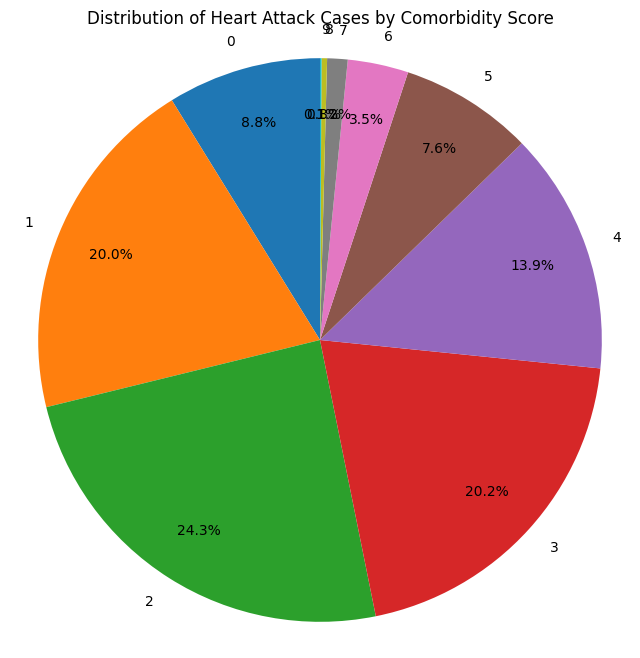

In [17]:
# Visualize by pie chartlabels = score_stats['Comorbidity_Score']
sizes = score_stats['Percentage_of_Total']

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8
)

plt.title('Distribution of Heart Attack Cases by Comorbidity Score')
plt.axis('equal')  # makes the pie a circle
plt.show()




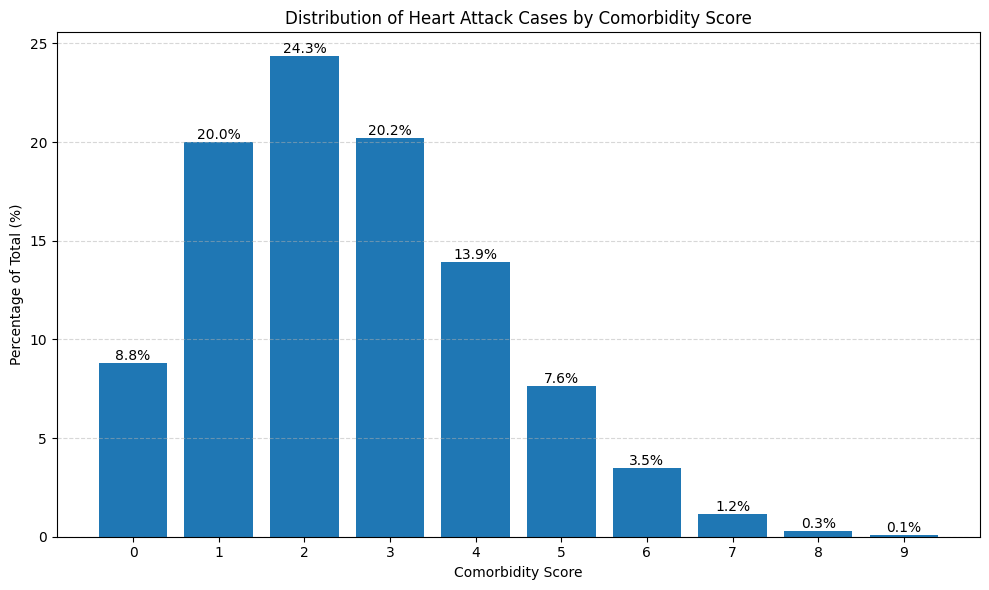

In [22]:
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes)

plt.xlabel('Comorbidity Score')
plt.ylabel('Percentage of Total (%)')
plt.title('Distribution of Heart Attack Cases by Comorbidity Score')

plt.xticks(labels)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


In [14]:
# Analyze by AgeCategoryummary_stats

Comorbidity_Score,0,1,2,3,4,5,6,7,8,9
AgeCategory,,,,,,,,,,
Age 18 to 24,28.69,27.87,18.03,12.30,4.92,1.64,1.64,1.64,1.64,1.64
Age 25 to 29,34.45,22.69,15.13,12.61,6.72,5.04,2.52,0.00,0.00,0.84
Age 30 to 34,21.39,24.60,25.67,12.83,10.16,3.21,1.60,0.53,0.00,0.00
Age 35 to 39,20.75,26.10,21.07,11.95,9.12,5.35,2.52,1.57,0.63,0.94
Age 40 to 44,16.18,24.04,23.37,14.38,11.46,5.39,3.60,0.90,0.67,0.00
Age 45 to 49,11.68,19.64,25.14,18.54,12.23,7.14,4.53,0.69,0.27,0.14
Age 50 to 54,12.24,20.32,20.08,17.36,16.08,9.52,3.04,1.04,0.32,0.00
Age 55 to 59,9.44,19.80,22.04,18.16,15.61,8.98,4.18,1.38,0.31,0.10
Age 60 to 64,8.86,19.65,23.39,19.90,13.88,8.65,4.05,1.18,0.38,0.07


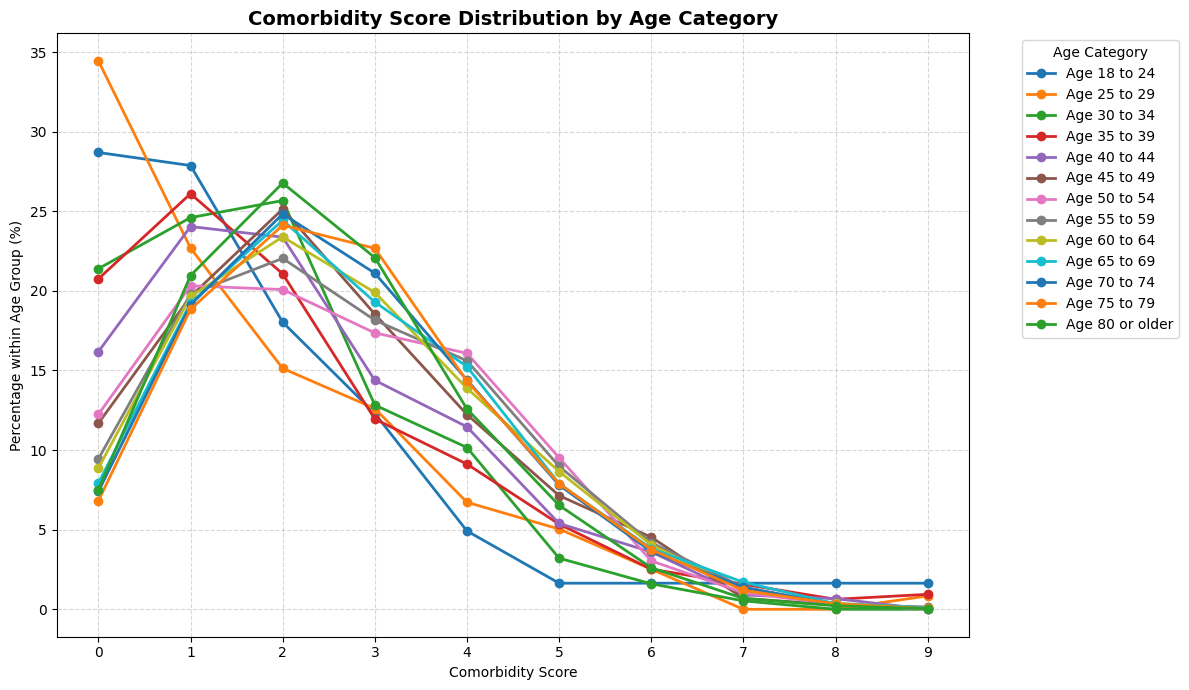

In [18]:
plt.figure(figsize=(12, 7))

for age in pivot_table.index:
    plt.plot(
        pivot_table.columns,
        pivot_table.loc[age],
        marker='o',
        linewidth=2,
        label=age
    )

plt.xlabel('Comorbidity Score')
plt.ylabel('Percentage within Age Group (%)')
plt.title('Comorbidity Score Distribution by Age Category', fontsize=14, weight='bold')

plt.xticks(range(10))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

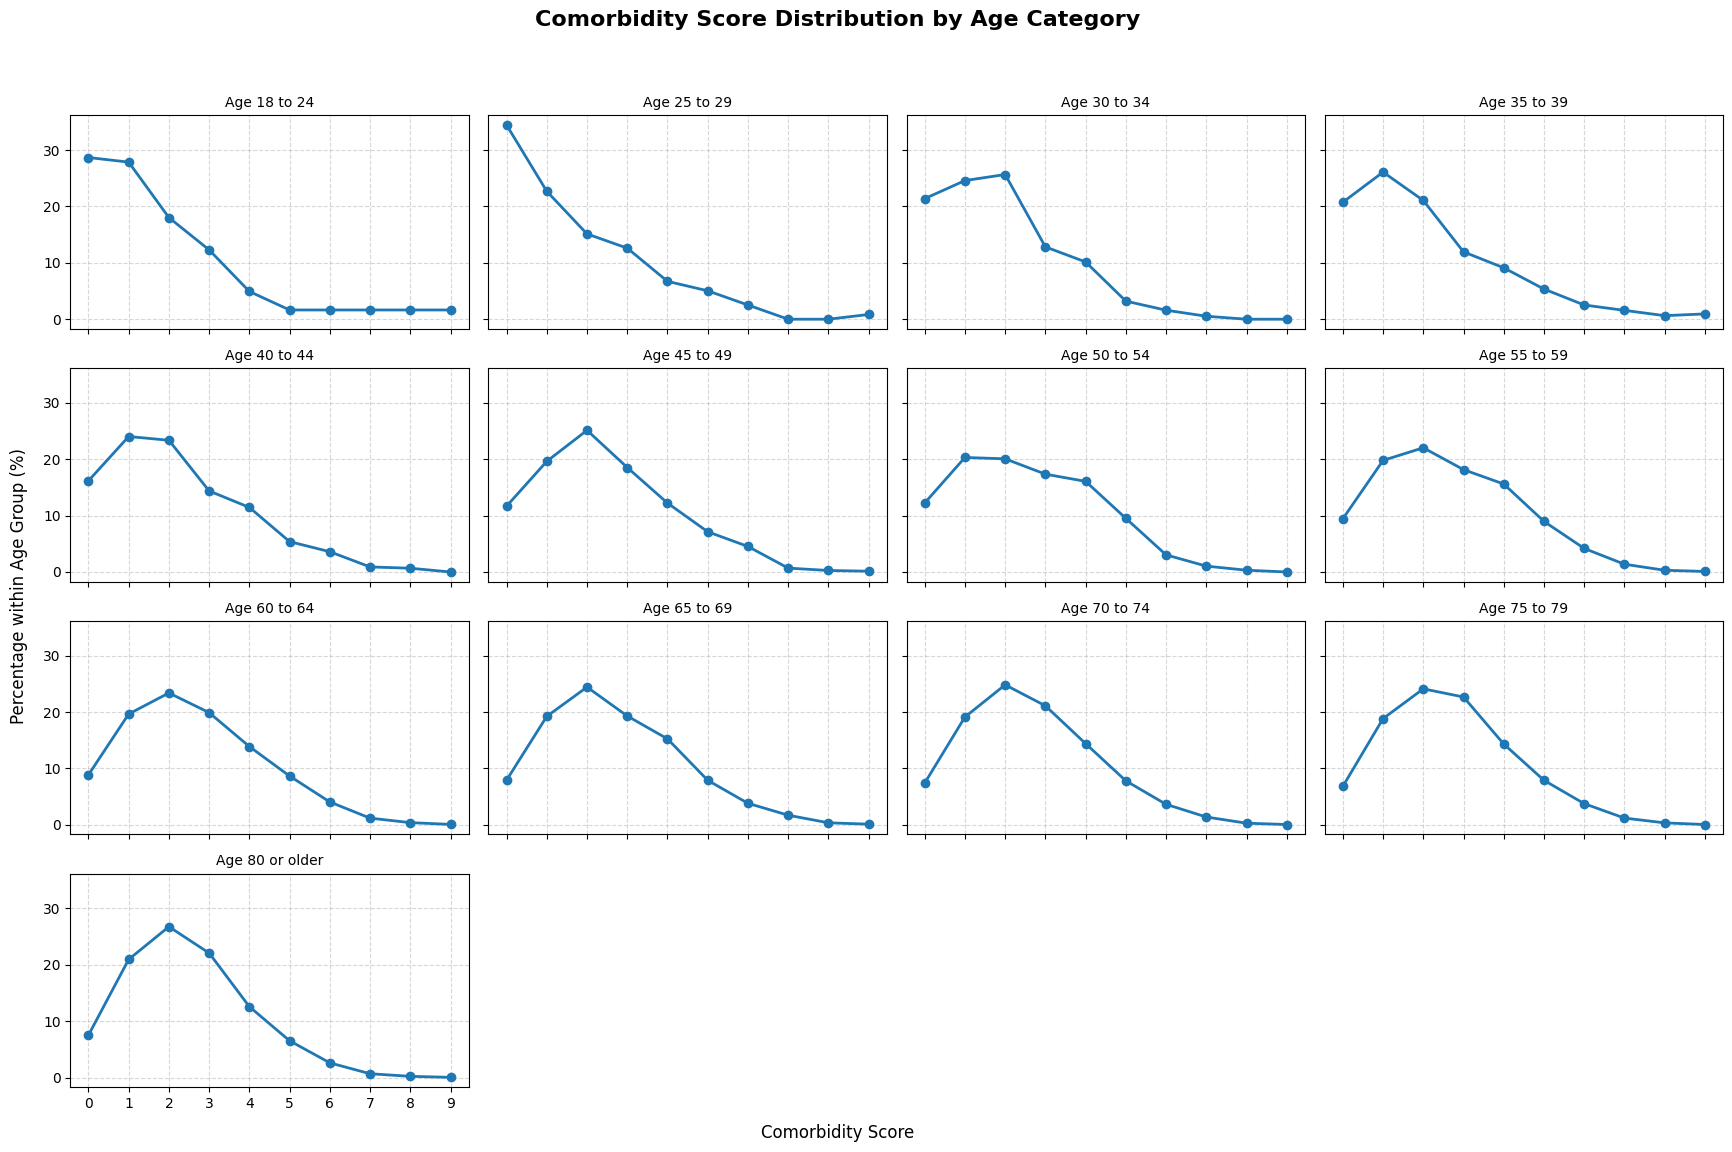

In [19]:
# Number of age groups
age_categories = pivot_table.index.tolist()
n = len(age_categories)

# Grid size (auto)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3), sharex=True, sharey=True)
axes = axes.flatten()

for i, age in enumerate(age_categories):
    axes[i].plot(
        pivot_table.columns,
        pivot_table.loc[age],
        marker='o',
        linewidth=2
    )
    axes[i].set_title(age, fontsize=10)
    axes[i].set_xticks(range(10))
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Common labels
fig.text(0.5, 0.04, 'Comorbidity Score', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Percentage within Age Group (%)', va='center', rotation='vertical', fontsize=12)

fig.suptitle(
    'Comorbidity Score Distribution by Age Category',
    fontsize=16,
    weight='bold'
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()


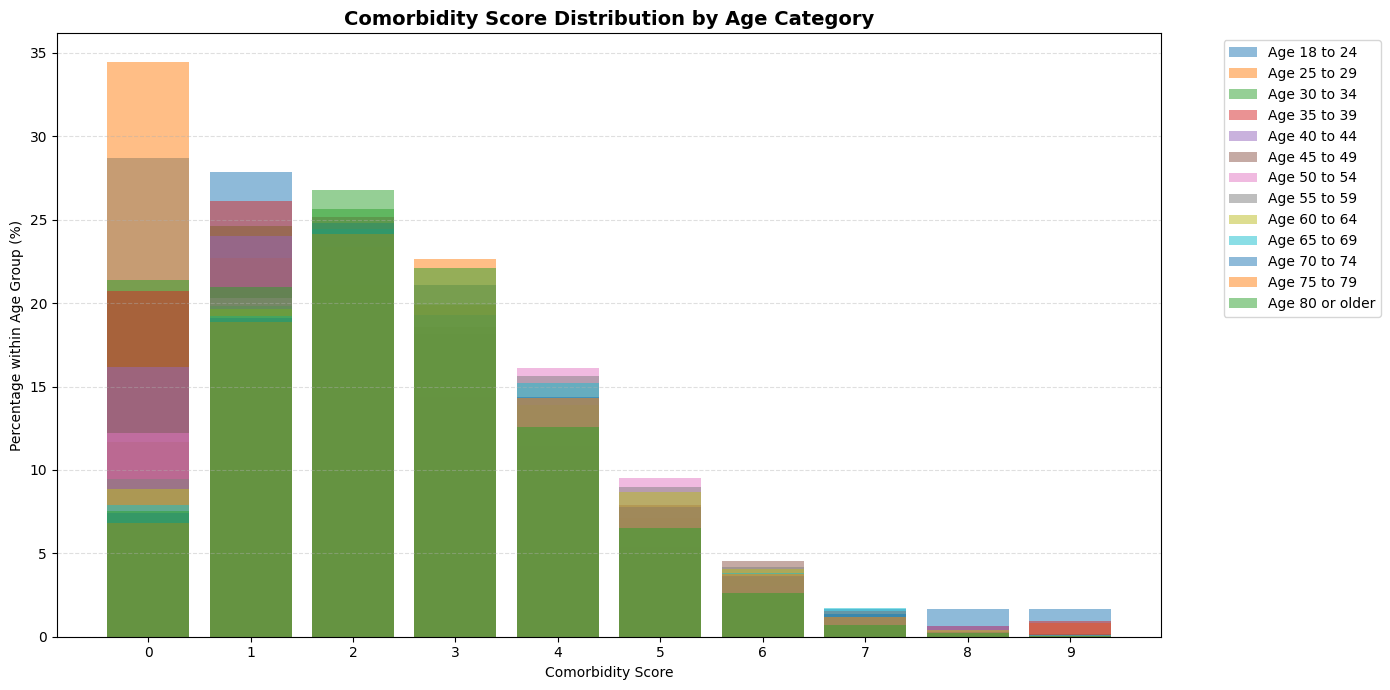

In [20]:
plt.figure(figsize=(14, 7))

for age in pivot_table.index:
    plt.bar(
        pivot_table.columns,
        pivot_table.loc[age],
        alpha=0.5,
        label=age
    )

plt.xlabel('Comorbidity Score')
plt.ylabel('Percentage within Age Group (%)')
plt.title('Comorbidity Score Distribution by Age Category', fontsize=14, weight='bold')
plt.xticks(range(10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


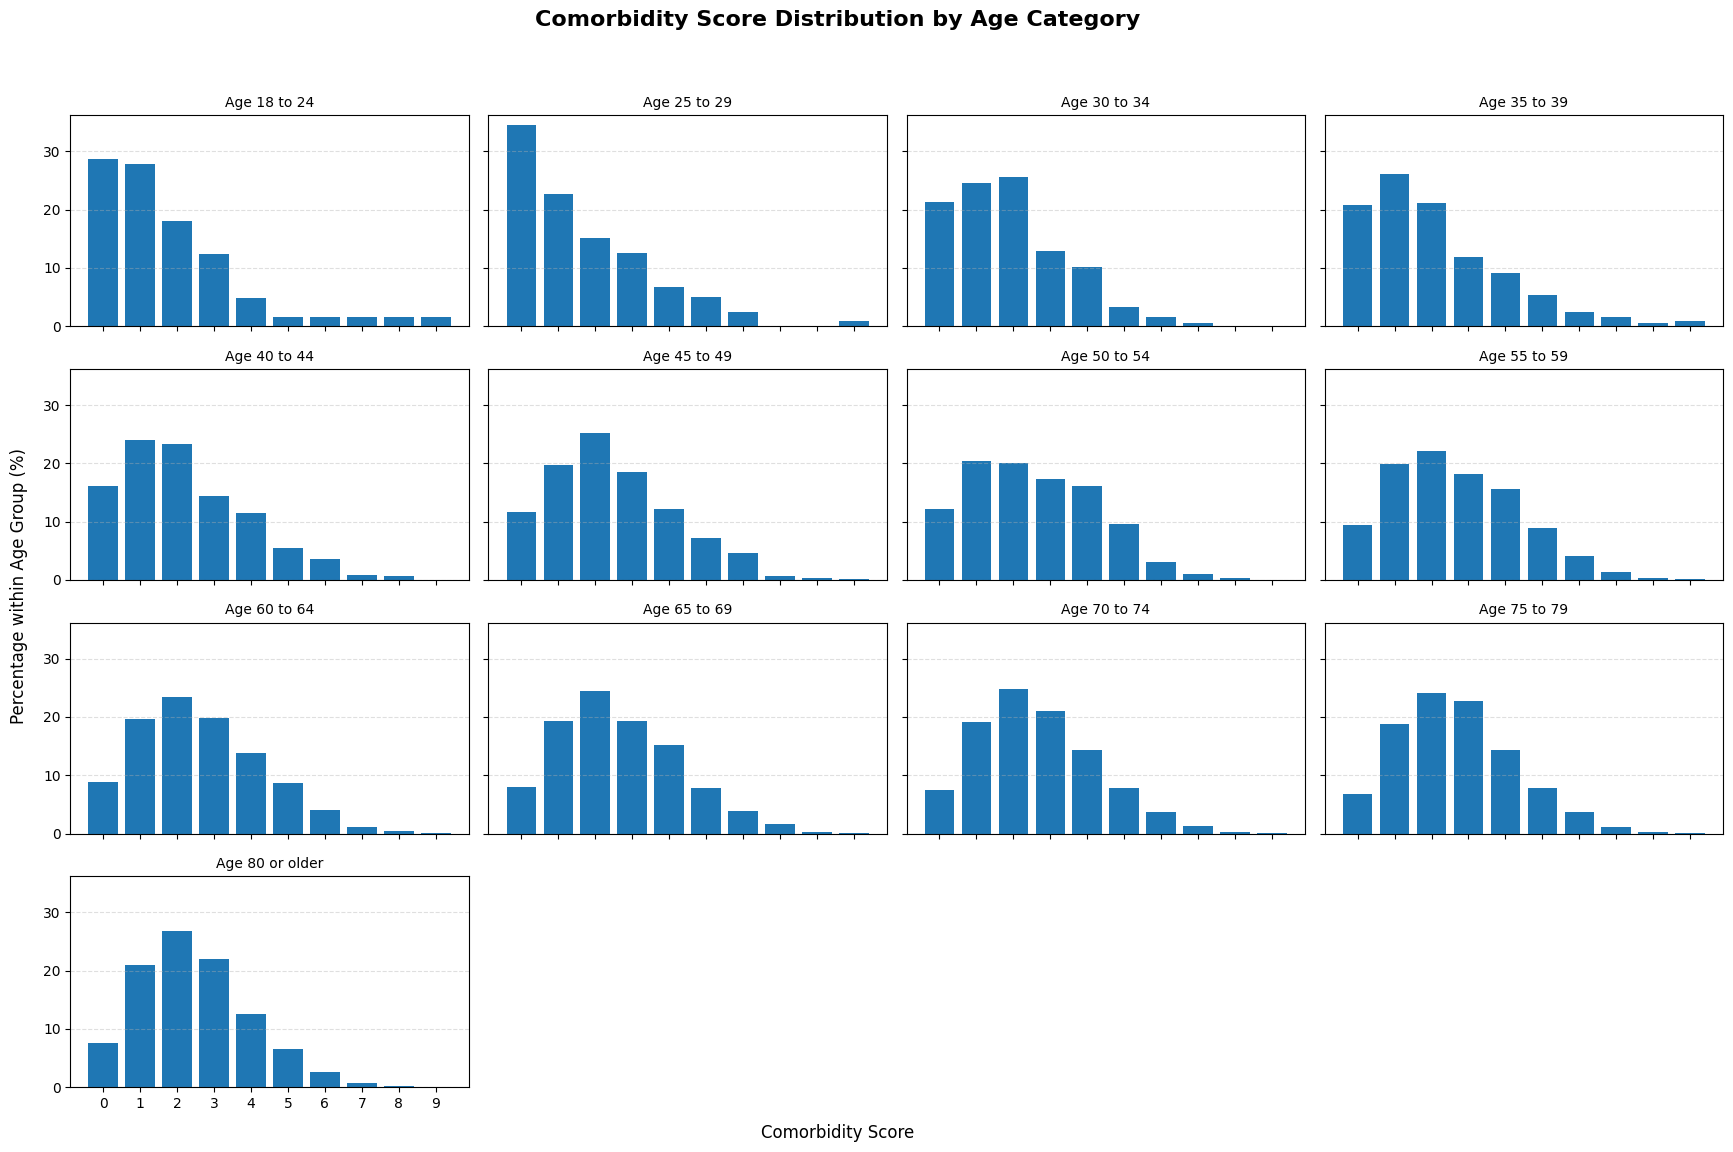

In [21]:
age_categories = pivot_table.index.tolist()
n = len(age_categories)

cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3), sharex=True, sharey=True)
axes = axes.flatten()

for i, age in enumerate(age_categories):
    axes[i].bar(
        pivot_table.columns,
        pivot_table.loc[age]
    )
    axes[i].set_title(age, fontsize=10)
    axes[i].set_xticks(range(10))
    axes[i].grid(axis='y', linestyle='--', alpha=0.4)

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(0.5, 0.04, 'Comorbidity Score', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Percentage within Age Group (%)', va='center', rotation='vertical', fontsize=12)

fig.suptitle(
    'Comorbidity Score Distribution by Age Category',
    fontsize=16,
    weight='bold'
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()


#### **Câu hỏi 2: Mối liên hệ "Tâm - Thân" và Giấc ngủ**

**1. The Question**
> *"Sức khỏe tinh thần (MentalHealthDays) và thời lượng giấc ngủ (SleepHours) tương tác như thế nào đối với nguy cơ Đau tim? Liệu hoạt động thể chất (PhysicalActivities) có đóng vai trò là yếu tố bảo vệ, giúp giảm nhẹ rủi ro tim mạch ở những người có vấn đề về giấc ngủ hoặc căng thẳng tâm lý không?"*

**2. Motivation & Benefits**
* **Motivation:** Giấc ngủ và stress là hai yếu tố lối sống thường bị xem nhẹ so với ăn uống hay hút thuốc. Câu hỏi này kiểm chứng giả thuyết "tập thể dục có thể bù đắp cho stress/thiếu ngủ".
* **Benefits:** Đưa ra các khuyến nghị lối sống cụ thể (ví dụ: "Nếu bạn mất ngủ, hãy tập thể dục để giảm rủi ro tim mạch").
* **Stakeholders:** Chuyên gia tư vấn tâm lý, Huấn luyện viên sức khỏe.

**3. Data Analysis Plan**
* **A. Preprocessing:**
    * Binning (Phân nhóm) cột `SleepHours` thành các nhóm: "Thiếu ngủ" (<6h), "Bình thường" (6-8h), "Ngủ nhiều" (>8h).
    * Phân nhóm `MentalHealthDays` thành: "Tốt" (0 ngày), "Trung bình" (1-13 ngày), "Kém" (>=14 ngày).
* **B. Analysis:**
    * Phân tích đa biến (Multivariate Analysis) để xem tỷ lệ đau tim thay đổi ra sao khi kết hợp 3 yếu tố: Giấc ngủ + Sức khỏe tâm thần + Hoạt động thể chất.
* **C. Visualization:**
    * **Heatmap:** Trục X là Nhóm Giấc ngủ, Trục Y là Nhóm Sức khỏe tâm thần, màu sắc là Tỷ lệ Đau tim. Vẽ 2 Heatmap riêng biệt: Một cho nhóm "Có tập thể dục" và một cho nhóm "Không tập thể dục" để so sánh sự khác biệt (Delta).




### PHẦN 2: CÂU HỎI HỌC MÁY (MACHINE LEARNING)

#### **Câu hỏi 3: Dự đoán rủi ro (Supervised Learning - Classification)**

**1. The Question**
> *"Có thể xây dựng một mô hình phân lớp (Classification Model) để dự đoán chính xác khả năng một người từng bị Đau tim dựa trên các chỉ số sàng lọc không xâm lấn (Non-invasive) không? Mô hình nào (Logistic Regression vs. Random Forest) sẽ hiệu quả hơn trong việc cân bằng giữa độ chính xác và khả năng giải thích các yếu tố rủi ro?"*

**2. Motivation & Benefits**
* **Motivation:** Mục tiêu là tạo ra công cụ sàng lọc sơ cấp giá rẻ, không cần xét nghiệm máu hay chụp chiếu phức tạp.
* **Benefits:** Ứng dụng tích hợp vào các app sức khỏe hoặc ki-ốt y tế công cộng để cảnh báo sớm.
* **Model Selection:**
    * *Logistic Regression:* Để xem xét tỷ suất chênh (Odds Ratio) - ví dụ: "Hút thuốc làm tăng rủi ro gấp X lần".
    * *Random Forest/XGBoost:* Để đạt độ chính xác cao nhất và xử lý các mối quan hệ phi tuyến tính.

**3. Data Analysis Plan**
* **A. Preprocessing:**
    * One-hot Encoding cho biến định danh (Sex, Race...).
    * Xử lý mất cân bằng dữ liệu (Imbalanced Data) bằng kỹ thuật SMOTE hoặc Undersampling (vì số người bị đau tim thường ít hơn người khỏe).
    * Scaling dữ liệu số (BMI, PhysicalHealthDays...).
* **B. Analysis:**
    * Huấn luyện 2 mô hình: Logistic Regression và Random Forest.
    * Sử dụng GridSearch để tối ưu tham số.
* **C. Evaluation:**
    * So sánh bằng **ROC-AUC** và **Recall** (để tránh bỏ sót người bệnh).
    * Vẽ biểu đồ **Feature Importance** để xếp hạng xem yếu tố nào (Tuổi, BMI, hay Thuốc lá...) quan trọng nhất.

---



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

# Thư viện xử lý mất cân bằng dữ liệu
from imblearn.over_sampling import SMOTE

In [6]:
drop_cols = ['HeightInMeters', 'WeightInKilograms', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
             'BlindOrVisionDifficulty', 'DeafOrHardOfHearing', 'HIVTesting', 'CovidPos', 'RemovedTeeth']
df_first_model = df.copy()
df_first_model = df_first_model.drop(columns=drop_cols)

In [7]:
numerical_cols = df_first_model.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_first_model.select_dtypes(include=['object']).columns.tolist()

In [8]:
df_numerical = df_first_model[numerical_cols]
# Fill NaN with mean for each column
df_numerical = df_numerical.fillna(df_numerical.mean())

In [9]:
def count_outliers_iqr(df, columns):
    outlier_counts = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers
    
    # Create result DataFrame
    result = pd.DataFrame(list(outlier_counts.items()), 
                         columns=['Column', 'Outlier_Count'])
    result['Percentage'] = (result['Outlier_Count'] / len(df) * 100).round(2)
    
    return result

def fix_outliers_iqr(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean[col] = np.clip(df_clean[col], lower_bound, upper_bound)
        
    return df_clean

def plot_outlier_comparison(df_before, df_after, columns):
    sns.set_style("whitegrid")

    n_cols = len(columns)
    
    fig, axes = plt.subplots(n_cols, 2, figsize=(14, 5 * n_cols))
    
    if n_cols == 1:
        axes = [axes]

    for i, col in enumerate(columns):
        # Plot Before
        sns.boxplot(data=df_before, x=col, ax=axes[i][0], color='salmon')
        axes[i][0].set_title(f'Original Distribution: {col}', fontsize=12, fontweight='bold')
        axes[i][0].set_xlabel('')
        
        # Plot After
        sns.boxplot(data=df_after, x=col, ax=axes[i][1], color='lightgreen')
        axes[i][1].set_title(f'After Capping: {col}', fontsize=12, fontweight='bold')
        axes[i][1].set_xlabel('')

    plt.tight_layout()
    plt.show()


In [13]:
outliers = count_outliers_iqr(df_numerical, numerical_cols)
outliers

,Column,Outlier_Count,Percentage
0,PhysicalHealthDays,59508,13.37
1,MentalHealthDays,61769,13.88
2,SleepHours,7260,1.63
3,BMI,19007,4.27


In [14]:
standard_columns = outliers[outliers['Percentage'] > 10]['Column'].tolist()
df_no_outliers = fix_outliers_iqr(df_numerical, standard_columns)
new_outliers = count_outliers_iqr(df_no_outliers, numerical_cols)
new_outliers

,Column,Outlier_Count,Percentage
0,PhysicalHealthDays,0,0.00
1,MentalHealthDays,0,0.00
2,SleepHours,7260,1.63
3,BMI,19007,4.27


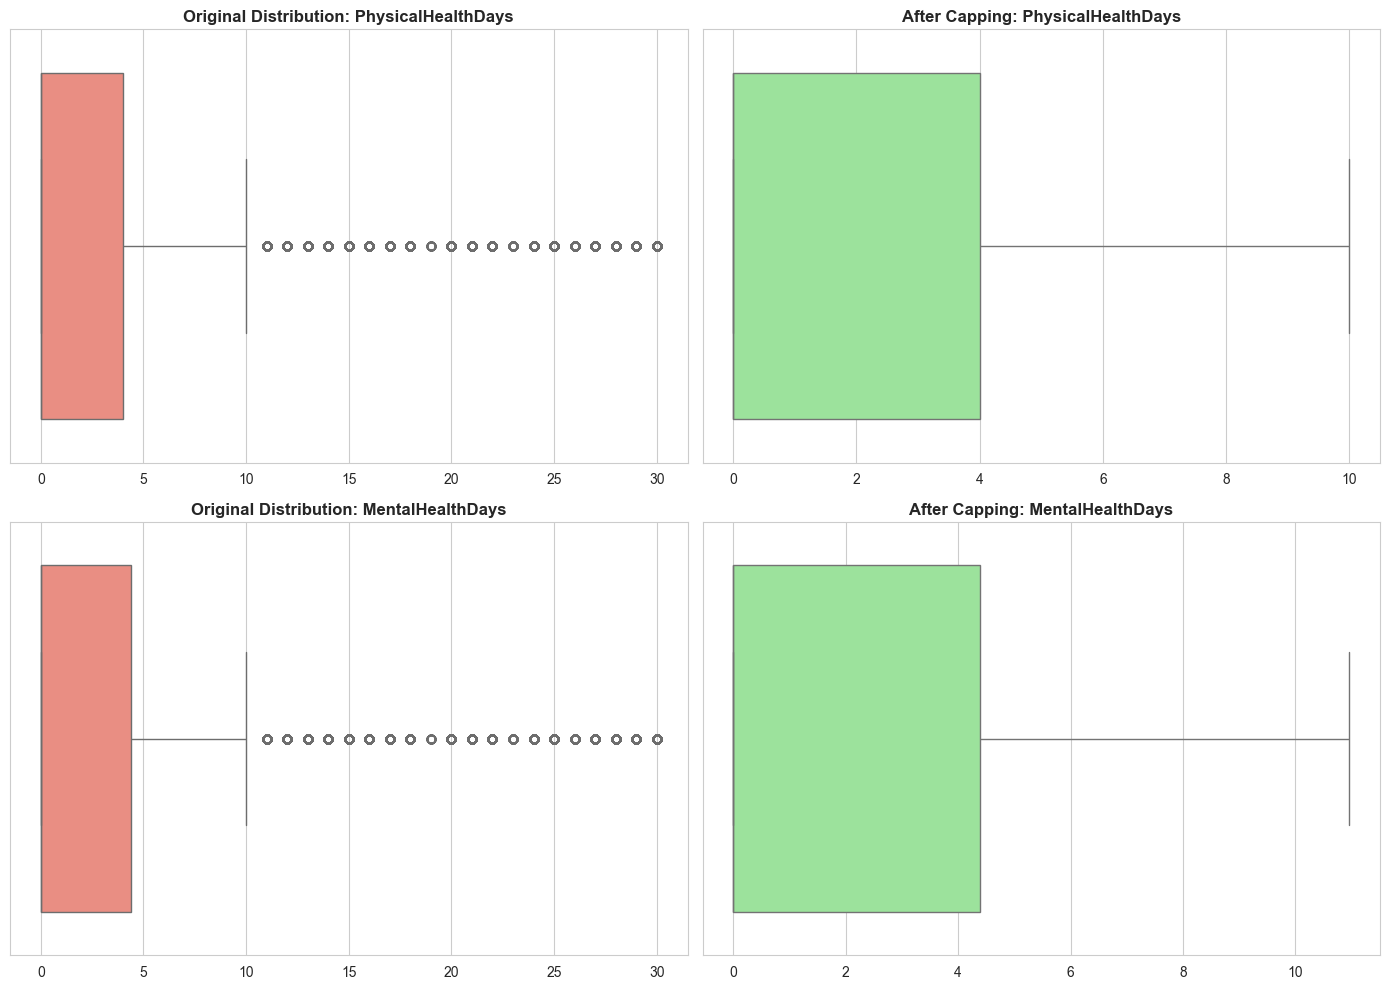

In [146]:
plot_outlier_comparison(df_numerical, df_no_outliers, standard_columns)

In [15]:
df_numerical = df_no_outliers.copy()

In [16]:
def solve_nan(df, columns):
    """
    Replace NaN in the specified categorical columns with the most frequent (mode) value.
    Returns a copy of the DataFrame.
    """
    df_filled = df.copy()
    for col in columns:
        if col not in df_filled.columns:
            continue
        mode_vals = df_filled[col].mode(dropna=True)
        if not mode_vals.empty:
            df_filled[col] = df_filled[col].fillna(mode_vals.iloc[0])
    return df_filled

In [17]:
df_categorical = df_first_model[categorical_cols]
df_categorical_filled = solve_nan(df_categorical, categorical_cols)


In [18]:
# one-hot columns
one_hot_col = ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime','ECigaretteUsage', 'SmokerStatus', 'RaceEthnicityCategory', 'AgeCategory']

# Special handling (normalize to Yes/No only)
df_categorical_filled['HadDiabetes'] = df_categorical_filled['HadDiabetes'].replace({
    'No': 'No',
    'Yes, but only during pregnancy (female)': 'No',
    'Yes': 'Yes',
    'No, pre-diabetes or borderline diabetes': 'No'
})

# Binary every column except one_hot_col and 'HadDiabetes' (fully vectorized)
binary_cols = df_categorical_filled.columns.difference(one_hot_col + ['HadDiabetes']).tolist()
df_categorical_filled[binary_cols] = (df_categorical_filled[binary_cols] == 'Yes')

# Binary-encode HadDiabetes (after special handling)
df_categorical_filled['HadDiabetes'] = (df_categorical_filled['HadDiabetes'] == 'Yes')

# One-hot encode in one call (no loops)
df_categorical_filled = pd.get_dummies(df_categorical_filled, columns=one_hot_col, drop_first=False)


In [19]:
df_categorical = df_categorical_filled.copy()

In [20]:
df_first_model_preprocessed = pd.concat([df_numerical, df_categorical], axis=1)
df_first_model_preprocessed

,PhysicalHealthDays,MentalHealthDays,SleepHours,BMI,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older
0,0.0,0.000000,8.0,28.529842,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.0,0.000000,6.0,26.570000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,2.0,3.000000,5.0,25.610000,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,0.0,0.000000,7.0,23.300000,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,2.0,0.000000,9.0,21.770000,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,3.000000,6.0,25.630000,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
445128,2.0,2.000000,7.0,28.660000,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
445129,10.0,10.956623,5.0,17.230000,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
445130,0.0,0.000000,5.0,32.550000,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [21]:
target_col = 'HadHeartAttack'
X = df_first_model_preprocessed.drop(columns=[target_col])
y = df_first_model_preprocessed[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

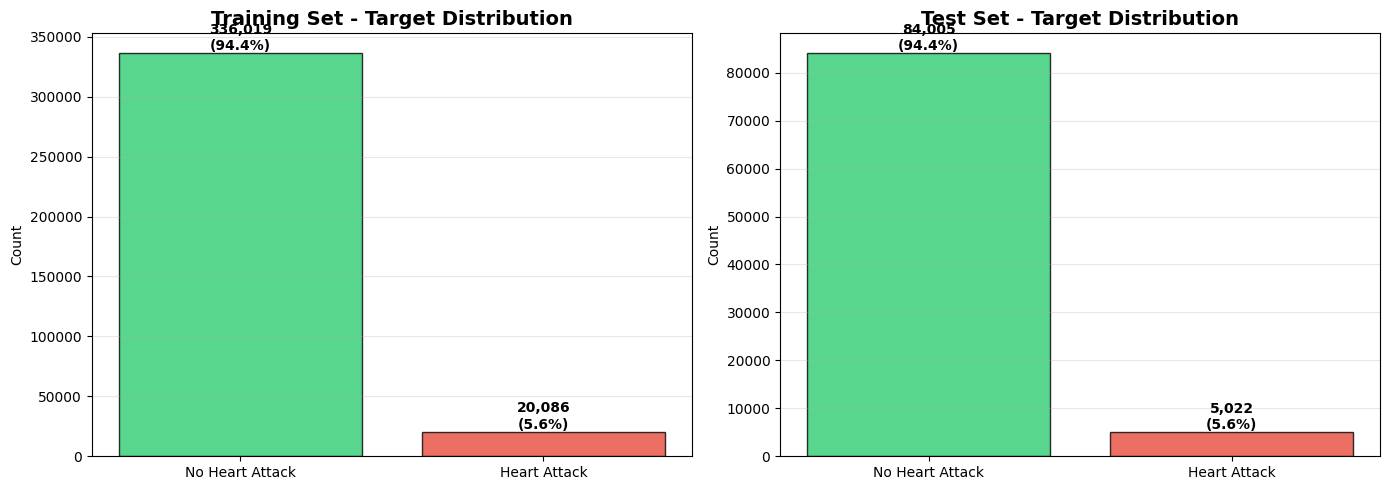


 Class Imbalance Ratio: 16.73:1 (No:Yes)
 Majority class (No): 336,019 (94.36%)
 Minority class (Yes): 20,086 (5.64%)

 Recommendation Use SMOTE (oversampling) or class_weight='balanced'
   Reason: Severe imbalance (ratio > 3:1)


In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set distribution
train_counts = y_train.value_counts()
axes[0].bar(['No Heart Attack', 'Heart Attack'], train_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[0].set_title('Training Set - Target Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(train_counts.values):
    axes[0].text(i, v + 500, f'{v:,}\n({v/len(y_train)*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

# Test set distribution
test_counts = y_test.value_counts()
axes[1].bar(['No Heart Attack', 'Heart Attack'], test_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[1].set_title('Test Set - Target Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(test_counts.values):
    axes[1].text(i, v + 100, f'{v:,}\n({v/len(y_test)*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate imbalance ratio
imbalance_ratio = train_counts[False] / train_counts[True]
print(f"\n Class Imbalance Ratio: {imbalance_ratio:.2f}:1 (No:Yes)")
print(f" Majority class (No): {train_counts[False]:,} ({train_counts[False]/len(y_train)*100:.2f}%)")
print(f" Minority class (Yes): {train_counts[True]:,} ({train_counts[True]/len(y_train)*100:.2f}%)")

if imbalance_ratio > 3:
    print(f"\n Recommendation Use SMOTE (oversampling) or class_weight='balanced'")
    print(f"   Reason: Severe imbalance (ratio > 3:1)")
elif imbalance_ratio > 1.5:
    print(f"\n Recommendation Consider class_weight='balanced' or light oversampling")
else:
    print(f"\n Recommendation No resampling needed - classes are relatively balanced")

In [ ]:
# Check class distribution before SMOTE
print("="*60)
print("Class Distribution - Before SMOTE")
print("="*60)
class_counts_before = np.bincount(y_train.astype(int))
print(f"No Heart Attack (0):  {class_counts_before[0]:,} ({class_counts_before[0]/len(y_train)*100:.2f}%)")
print(f"Heart Attack (1):     {class_counts_before[1]:,} ({class_counts_before[1]/len(y_train)*100:.2f}%)")
print(f"Imbalance Ratio:      {class_counts_before[0]/class_counts_before[1]:.2f}:1")

# Apply SMOTE
print("\nApplying SMOTE oversampling...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\n" + "="*60)
print("Class Distribution - After SMOTE")
print("="*60)
class_counts_after = np.bincount(y_train_resampled.astype(int))
print(f"No Heart Attack (0):  {class_counts_after[0]:,} ({class_counts_after[0]/len(y_train_resampled)*100:.2f}%)")
print(f"Heart Attack (1):     {class_counts_after[1]:,} ({class_counts_after[1]/len(y_train_resampled)*100:.2f}%)")
print(f"Imbalance Ratio:      {class_counts_after[0]/class_counts_after[1]:.2f}:1")

# Visualize before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before SMOTE
axes[0].bar(['No (0)', 'Yes (1)'], class_counts_before, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=2)
axes[0].set_title('Before SMOTE - Imbalanced', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(class_counts_before):
    axes[0].text(i, v + 5000, f'{v:,}\n({v/len(y_train)*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

# After SMOTE
axes[1].bar(['No (0)', 'Yes (1)'], class_counts_after, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=2)
axes[1].set_title('After SMOTE - Balanced', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(class_counts_after):
    axes[1].text(i, v + 5000, f'{v:,}\n({v/len(y_train_resampled)*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nDataset is now balanced. Ready for training.")

Class Distribution - Before Resampling
No Heart Attack (0):  336,019 (94.36%)
Heart Attack (1):     20,086 (5.64%)
Imbalance Ratio:      16.73:1

Applying SMOTETomek (SMOTE + Undersampling)...


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
import time

def evaluate_models_kfold(X, y, k_fold=10):
    """
    Evaluate models using K-Fold Cross-Validation with SMOTE applied to each fold.
    Accumulate predictions to create averaged confusion matrices.
    
    Parameters:
    X: Feature matrix
    y: Target vector
    k_fold: Number of folds
    
    Returns:
    Dictionary with average scores and confusion matrices for each model
    """
    kf = KFold(n_splits=k_fold, shuffle=True, random_state=42)
    
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
    }
    
    history = {name: [] for name in models.keys()}
    
    # Store all predictions and true labels for confusion matrix
    all_predictions = {name: {'y_true': [], 'y_pred': []} for name in models.keys()}
    
    print(f"Starting {k_fold}-Fold Cross-Validation...")
    print("="*70)
    
    fold_num = 0
    for train_idx, test_idx in kf.split(X):
        fold_num += 1
        print(f"\nProcessing Fold {fold_num}/{k_fold}...")
        print("-" * 70)
        
        # Split data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Apply SMOTE only to training data
        smote = SMOTE(random_state=42)
        X_train_os, y_train_os = smote.fit_resample(X_train, y_train)
        
        # Train and evaluate each model
        for model_name, model in models.items():
            # Train
            model.fit(X_train_os, y_train_os)
            
            # Predict
            y_pred = model.predict(X_test)
            
            # Store predictions and true labels
            all_predictions[model_name]['y_true'].extend(y_test.tolist())
            all_predictions[model_name]['y_pred'].extend(y_pred.tolist())
            
            # Calculate metrics for this fold
            f1 = f1_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            
            # Store results
            history[model_name].append([f1, recall, precision])
            
            print(f"{model_name} => F1: {f1:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}")
        
        print("-" * 70)
    
    # Calculate average scores
    print("\n" + "="*70)
    print("Average Results Across All Folds")
    print("="*70)
    
    header = f"{'Model':<20} | {'Avg F1':<10} | {'Avg Recall':<10} | {'Avg Precision':<10}"
    print(header)
    print("-" * 70)
    
    final_results = {}
    confusion_matrices = {}
    
    for model_name, scores in history.items():
        # Average metrics
        avg_scores = np.mean(scores, axis=0)
        final_results[model_name] = avg_scores
        
        # Create confusion matrix from all accumulated predictions
        y_true_all = np.array(all_predictions[model_name]['y_true'])
        y_pred_all = np.array(all_predictions[model_name]['y_pred'])
        confusion_matrices[model_name] = confusion_matrix(y_true_all, y_pred_all)
        
        f1_avg, rec_avg, pre_avg = avg_scores
        row = f"{model_name:<20} | {f1_avg:<10.4f} | {rec_avg:<10.4f} | {pre_avg:<10.4f}"
        print(row)
    
    print("="*70)
    
    return final_results, confusion_matrices


def draw_performance_table(results, save_path=None):
    """Draw performance comparison table"""
    columns = ['Avg F1-Score', 'Avg Recall', 'Avg Precision']
    rows = list(results.keys())
    data_values = np.array([results[model] for model in rows])
    cell_text = [[f"{x:.4f}" for x in row] for row in data_values]

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    
    the_table = ax.table(cellText=cell_text,
                         rowLabels=rows,
                         colLabels=columns,
                         cellLoc='center',
                         loc='center')
    
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1.2, 2)
    
    # Color header
    for (row, col), cell in the_table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#2c3e50')
            cell.set_edgecolor('white')
        else:
            cell.set_edgecolor('#cccccc')
    
    # Highlight best scores
    for col_idx in range(len(columns)):
        max_val = np.max(data_values[:, col_idx])
        for row_idx in range(len(rows)):
            if data_values[row_idx, col_idx] == max_val:
                cell = the_table[row_idx + 1, col_idx]
                cell.set_facecolor('#27ae60')
                cell.set_text_props(weight='bold', color='white')

    plt.title('Model Performance Comparison Table', pad=20, fontsize=14, fontweight='bold')
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Table saved to {save_path}")
    
    plt.show()


def draw_confusion_matrices(confusion_matrices, save_path=None):
    """Draw confusion matrices aggregated from all folds"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    model_names = list(confusion_matrices.keys())
    
    for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
        ax = axes[idx]
        
        # Plot heatmap
        im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
        ax.set_title(f'{model_name}\nConfusion Matrix (All Folds)', fontweight='bold')
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
        # Labels
        tick_marks = np.arange(2)
        ax.set_xticks(tick_marks)
        ax.set_yticks(tick_marks)
        ax.set_xticklabels(['No (0)', 'Yes (1)'])
        ax.set_yticklabels(['No (0)', 'Yes (1)'])
        ax.set_ylabel('True Label', fontweight='bold')
        ax.set_xlabel('Predicted Label', fontweight='bold')
        
        # Add text annotations
        thresh = cm.max() / 2.
        for i in range(2):
            for j in range(2):
                ax.text(j, i, format(cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if cm[i, j] > thresh else "black",
                       fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Confusion matrices saved to {save_path}")
    
    plt.show()


# Execute evaluation
print("Preparing data for K-Fold Cross-Validation...")
final_scores, conf_matrices = evaluate_models_kfold(X_train, y_train, k_fold=10)

# Draw results
print("\nGenerating performance table...")
draw_performance_table(final_scores)

print("\nGenerating confusion matrices aggregated from all folds...")
draw_confusion_matrices(conf_matrices)

Preparing data for K-Fold Cross-Validation...
Starting 10-Fold Cross-Validation...

Processing Fold 1/10...
----------------------------------------------------------------------



#### **Câu hỏi 4: Phân cụm hồ sơ bệnh nhân (Unsupervised Learning - Clustering)**

**1. The Question**
> *"Chúng ta có thể phân nhóm (Clustering) quần thể tham gia khảo sát thành các 'Hồ sơ sức khỏe' (Health Profiles) riêng biệt dựa trên lối sống và các đặc điểm dân cư (giới tính, BMI, state) Nhóm (Cluster) nào có tỷ lệ rủi ro Đau tim tiềm ẩn cao nhất và đặc điểm nhận dạng chính của nhóm đó là gì?"*

**2. Motivation & Benefits**
* **Motivation:** Thay vì dự đoán "Có/Không", chúng ta muốn hiểu cấu trúc tự nhiên của dữ liệu. 
* **Benefits:** Giúp thiết kế các chiến dịch y tế công cộng "may đo" riêng cho từng nhóm đối tượng đặc thù (Targeted Intervention).
* **Model Selection:** K-Means Clustering hoặc Hierarchical Clustering.

**3. Data Analysis Plan**
* **A. Preprocessing:**
    * Chỉ chọn các cột liên quan đến Lối sống (Group 6) và Bệnh nền (Group 4) để phân cụm. KHÔNG đưa cột `HadHeartAttack` vào quá trình huấn luyện (để xem mô hình tự học ra sao).
    * Dùng PCA (Principal Component Analysis) để giảm chiều dữ liệu xuống 2D hoặc 3D nhằm trực quan hóa.
* **B. Analysis:**
    * Dùng **Elbow Method** để chọn số lượng cụm (k) tối ưu (ví dụ: k=4 nhóm).
    * Chạy thuật toán K-Means để gán nhãn cho từng dòng dữ liệu.
* **C. Interpretation:**
    * Tính toán thống kê mô tả (Mean/Mode) cho từng Cluster để đặt tên (ví dụ: Cluster 1 = "Nhóm Lối sống lành mạnh", Cluster 2 = "Nhóm Bệnh lý chuyển hóa"...).
    * Tính tỷ lệ `HadHeartAttack` thực tế trong từng Cluster để xác định nhóm rủi ro cao nhất.

In [ ]:
# 1. CHỌN CÁC BIẾN CHO CLUSTERING (Không bao gồm HadHeartAttack)

# Group 1: Demographics (một phần)
demo_features = ['AgeCategory', 'Sex']

# Group 3: Physical health metrics 
physical_features = ['BMI', 'GeneralHealth']

# Group 4: Chronic conditions (Bệnh nền)
chronic_features = ['HadDiabetes', 'HadKidneyDisease', 'HadArthritis']

# Group 6: Lifestyle and behaviours  
lifestyle_features = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']

## merge các cluster
clustering_features = lifestyle_features + physical_features + chronic_features + demo_features

print("CÁC BIẾN ĐƯỢC CHỌN CHO CLUSTERING:")
print("="*50)
for group_name, features in [
    ("Lifestyle & Behaviours", lifestyle_features),
    ("Physical Health", physical_features), 
    ("Chronic Conditions", chronic_features),
    ("Demographics", demo_features)
]:
    print(f"{group_name}: {features}")

print(f"\n TỔNG CỘNG: {len(clustering_features)} features")
print(f"Features: {clustering_features}")

In [ ]:
# Kiểm tra columns hiện có trong dataset
print("📊 COLUMNS HIỆN CÓ TRONG DATASET:")
print("="*50)
print(f"Tổng số columns: {len(df.columns)}")
print("Danh sách columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nDataset shape: {df.shape}")
print(f"Target column (HadHeartAttack) distribution:")
if 'HadHeartAttack' in df.columns:
    print(df['HadHeartAttack'].value_counts())
else:
    print("⚠️ Không tìm thấy column HadHeartAttack")

In [ ]:
## Đầu tiên là phân tích về hành vi

## các group trong pre-processing cần quan tâm: 
## 1. Group 6: Lifestyle and behaviours (Trọng tâm số 1) - Biến quan trọng: SmokerStatus, AlcoholDrinkers, PhysicalActivities.
## Group 3: Physical health metrics - BMI và GeneralHealth Bỏ HeightInMeters và WeightInKilograms (như đã bàn trước đó, vì BMI đã bao hàm chúng).

## Group 4: Chronic conditions (Bệnh nền): HadDiabetes (quan trọng nhất với tim), HadKidneyDisease, HadArthritis

## Group 1: Demographics: AgeCategory, Sex, State.

# gom cụm chia thành các nhóm: Nhóm 1: "Thanh niên khỏe mạnh" (The Young & Healthy) - Tuổi trẻ, BMI chuẩn, Vận động nhiều, Không bệnh nền. Nhóm 2: "Rủi ro lối sống" (The Lifestyle Risk) - Tuổi trung niên, BMI cao (Béo phì), Hút thuốc/Rượu, Lười vận động., Nhóm 3: "Người cao tuổi & Bệnh mãn tính" (The Senior Comorbid)- Tuổi cao (65+) Nhiều bệnh nền (Tiểu đường, Khớp, Thận), Khó đi lại., Nhóm 4: The Mental Health Strugglers (Khủng hoảng tâm lý) - Tuổi trẻ/trung niên, MentalHealthDays cao, Trầm cảm, Ngủ kém.

In [ ]:
# ===============================================
# 🎯 BƯỚC 4: CHUẨN HÓA DỮ LIỆU VÀ CHỌN SỐ CLUSTERS
# ===============================================
df_cluster = df[clustering_features + ['HadHeartAttack']].copy()

print(f"Dataset for clustering: {df_cluster.shape}")
print(f"Features sử dụng: {clustering_features}")

le_dict = {}
X_encoded = X_cluster.copy()

categorical_features = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities', 
                       'GeneralHealth', 'HadDiabetes', 'HadKidneyDisease', 
                       'HadArthritis', 'AgeCategory', 'Sex']

print(f"\n🔄 Encoding categorical variables...")

for col in categorical_features:
    if col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        le_dict[col] = le
        print(f"   ✓ {col}: {len(le.classes_)} categories")

print(f"\n📊 Encoded dataset shape: {X_encoded.shape}")
print(f"📝 Sample encoded data:")
print(X_encoded.head())

# Chuẩn hóa dữ liệu (quan trọng cho clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print(f"✅ Đã chuẩn hóa dữ liệu: {X_scaled.shape}")

# Sample nhỏ để test (do dataset lớn)
sample_size = 50000
np.random.seed(42)
sample_idx = np.random.choice(X_scaled.shape[0], size=sample_size, replace=False)
X_sample = X_scaled[sample_idx]
y_sample = y_target.iloc[sample_idx]

print(f"📊 Sample size for clustering: {X_sample.shape}")
print(f"🎯 Sample target distribution:")
print(y_sample.value_counts(normalize=True).round(3))

# Elbow method để chọn số clusters
inertias = []
k_range = range(2, 11)

print(f"\n🔍 Đang tìm số clusters tối ưu...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_sample)
    inertias.append(kmeans.inertia_)
    print(f"   K={k}: Inertia={kmeans.inertia_:.0f}")

print(f"\n✅ Hoàn thành elbow method!")

# Vẽ elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Highlight potential elbow
optimal_k = 4  # Based on your predefined 4 groups
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.text(optimal_k+0.1, max(inertias)*0.8, f'Chosen K={optimal_k}', 
         fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"🎯 Chọn K={optimal_k} clusters dựa trên phân nhóm đã định nghĩa!")

In [ ]:
# ===============================================
# 🎯 BƯỚC 5: THỰC HIỆN CLUSTERING VỚI K=4
# ===============================================

# Chạy K-means với K=4
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
cluster_labels = kmeans_final.fit_predict(X_sample)

print(f"✅ Đã hoàn thành clustering với K={optimal_k}")

# Tạo DataFrame kết quả
df_clustered = pd.DataFrame(X_sample, columns=clustering_features)
df_clustered['Cluster'] = cluster_labels
df_clustered['HadHeartAttack'] = y_sample.values

print(f"📊 Phân phối clusters:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for i in range(optimal_k):
    count = cluster_counts[i]
    pct = count/len(cluster_labels)*100
    print(f"   Cluster {i}: {count:,} người ({pct:.1f}%)")

# Tính tỷ lệ Heart Attack trong từng cluster
print(f"\n🚨 TỶ LỆ HEART ATTACK THEO CLUSTER:")
print("="*50)
heart_attack_by_cluster = df_clustered.groupby('Cluster')['HadHeartAttack'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).sort_values(ascending=False)

for cluster_id, rate in heart_attack_by_cluster.items():
    risk_level = "🔴 Rất Cao" if rate > 10 else "🟡 Cao" if rate > 7 else "🟢 Thấp"
    print(f"   Cluster {cluster_id}: {rate:.2f}% {risk_level}")

print(f"\n🎯 CLUSTER RỦI RO CAO NHẤT: Cluster {heart_attack_by_cluster.index[0]} ({heart_attack_by_cluster.iloc[0]:.2f}%)")

In [ ]:
# Tạo DataFrame để phân tích (cần decode về dạng original)
X_original = X_cluster.iloc[sample_idx].copy()
X_original['Cluster'] = cluster_labels
X_original['HadHeartAttack'] = y_sample.values

print("📊 PHÂN TÍCH ĐẶC ĐIỂM CỦA TỪNG CLUSTER:")
print("="*70)

# Function để phân tích cluster
def analyze_cluster(cluster_id, df):
    cluster_data = df[df['Cluster'] == cluster_id]
    total_count = len(cluster_data)
    heart_attack_rate = (cluster_data['HadHeartAttack'] == 'Yes').mean() * 100
    
    print(f"\n🏷️  CLUSTER {cluster_id} ({total_count:,} người - {heart_attack_rate:.1f}% Heart Attack)")
    print("-" * 60)
    
    # Demographics
    print("👥 DEMOGRAPHICS:")
    age_mode = cluster_data['AgeCategory'].mode().iloc[0] if len(cluster_data['AgeCategory'].mode()) > 0 else 'Unknown'
    sex_mode = cluster_data['Sex'].mode().iloc[0] if len(cluster_data['Sex'].mode()) > 0 else 'Unknown'
    print(f"   🎯 Age Group: {age_mode}")
    print(f"   👤 Gender: {sex_mode}")
    
    # Physical Health
    print("🏋️ PHYSICAL HEALTH:")
    bmi_mean = cluster_data['BMI'].mean()
    general_health_mode = cluster_data['GeneralHealth'].mode().iloc[0] if len(cluster_data['GeneralHealth'].mode()) > 0 else 'Unknown'
    print(f"   ⚖️  Average BMI: {bmi_mean:.1f}")
    print(f"   🏥 General Health: {general_health_mode}")
    
    # Lifestyle
    print("🚬 LIFESTYLE:")
    smoking_mode = cluster_data['SmokerStatus'].mode().iloc[0] if len(cluster_data['SmokerStatus'].mode()) > 0 else 'Unknown'
    alcohol_pct = (cluster_data['AlcoholDrinkers'] == 'Yes').mean() * 100
    exercise_pct = (cluster_data['PhysicalActivities'] == 'Yes').mean() * 100
    print(f"   🚭 Smoking: {smoking_mode}")
    print(f"   🍺 Alcohol Drinkers: {alcohol_pct:.1f}%")
    print(f"   🏃 Exercise: {exercise_pct:.1f}%")
    
    # Chronic Conditions
    print("🏥 CHRONIC CONDITIONS:")
    diabetes_pct = (cluster_data['HadDiabetes'] == 'Yes').mean() * 100
    kidney_pct = (cluster_data['HadKidneyDisease'] == 'Yes').mean() * 100
    arthritis_pct = (cluster_data['HadArthritis'] == 'Yes').mean() * 100
    print(f"   🩸 Diabetes: {diabetes_pct:.1f}%")
    print(f"   🫘 Kidney Disease: {kidney_pct:.1f}%")
    print(f"   🦴 Arthritis: {arthritis_pct:.1f}%")

# Phân tích từng cluster (sắp xếp theo mức độ rủi ro)
risk_order = [2, 0, 3, 1]  # Từ rủi ro cao đến thấp

for cluster_id in risk_order:
    analyze_cluster(cluster_id, X_original)

In [ ]:
# ===============================================
# 🎯 BƯỚC 7: ĐẶT TÊN VÀ VISUALIZATION CÁC CLUSTERS
# ===============================================

# Đặt tên cho các clusters dựa trên phân tích
cluster_names = {
    2: "🔴 Người cao tuổi & Bệnh mãn tính (The Senior Comorbid)",
    0: "🟡 Rủi ro lối sống (The Lifestyle Risk)", 
    3: "🟢 Thanh niên khỏe mạnh (The Young & Healthy)",
    1: "🔵 Trung niên ít rủi ro (The Middle-aged Low Risk)"
}

# Tạo summary table
summary_data = []
for cluster_id in [2, 0, 3, 1]:
    cluster_data = X_original[X_original['Cluster'] == cluster_id]
    heart_attack_rate = (cluster_data['HadHeartAttack'] == 'Yes').mean() * 100
    
    summary_data.append({
        'Cluster': f"{cluster_id}: {cluster_names[cluster_id]}",
        'Size': len(cluster_data),
        'Heart Attack Rate (%)': round(heart_attack_rate, 2),
        'Avg BMI': round(cluster_data['BMI'].mean(), 1),
        'Exercise Rate (%)': round((cluster_data['PhysicalActivities'] == 'Yes').mean() * 100, 1),
        'Diabetes Rate (%)': round((cluster_data['HadDiabetes'] == 'Yes').mean() * 100, 1)
    })

summary_df = pd.DataFrame(summary_data)

print("📋 TÓM TẮT CÁC HEALTH PROFILES:")
print("="*80)
print(summary_df.to_string(index=False))

# Visualization: Heart Attack Risk by Cluster
plt.figure(figsize=(15, 10))

# Subplot 1: Heart Attack Rate
plt.subplot(2, 2, 1)
colors = ['#e74c3c', '#f39c12', '#2ecc71', '#3498db']
bars = plt.bar(range(4), [heart_attack_by_cluster[i] for i in [2,0,3,1]], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=1)
plt.title('Tỷ lệ Heart Attack theo Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Heart Attack Rate (%)')
plt.xticks(range(4), [f'Cluster {i}' for i in [2,0,3,1]])
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Cluster Size
plt.subplot(2, 2, 2)  
cluster_sizes = [len(X_original[X_original['Cluster'] == i]) for i in [2,0,3,1]]
plt.pie(cluster_sizes, labels=[f'Cluster {i}' for i in [2,0,3,1]], 
        colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Phân phối kích thước Cluster', fontsize=12, fontweight='bold')

# Subplot 3: BMI by Cluster
plt.subplot(2, 2, 3)
bmi_by_cluster = [X_original[X_original['Cluster'] == i]['BMI'].mean() for i in [2,0,3,1]]
bars = plt.bar(range(4), bmi_by_cluster, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
plt.title('BMI trung bình theo Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Average BMI')
plt.xticks(range(4), [f'Cluster {i}' for i in [2,0,3,1]])
plt.axhline(y=25, color='red', linestyle='--', alpha=0.7, label='Overweight (BMI=25)')
plt.axhline(y=30, color='darkred', linestyle='--', alpha=0.7, label='Obese (BMI=30)')
plt.legend()
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Subplot 4: Exercise Rate
plt.subplot(2, 2, 4)
exercise_rates = [(X_original[X_original['Cluster'] == i]['PhysicalActivities'] == 'Yes').mean() * 100 for i in [2,0,3,1]]
bars = plt.bar(range(4), exercise_rates, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
plt.title('Tỷ lệ tập thể dục theo Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Exercise Rate (%)')
plt.xticks(range(4), [f'Cluster {i}' for i in [2,0,3,1]])
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 KẾT LUẬN CHÍNH:")
print("="*50)
print(f"🔴 CLUSTER RỦI RO CAO NHẤT: {cluster_names[2]}")
print(f"   ➤ Tỷ lệ Heart Attack: 17.41%")
print(f"   ➤ Đặc điểm: Người cao tuổi, nhiều bệnh mãn tính")
print(f"\n🟡 CLUSTER RỦI RO TRUNG BÌNH: {cluster_names[0]}")  
print(f"   ➤ Tỷ lệ Heart Attack: 11.97%")
print(f"   ➤ Đặc điểm: Lối sống không lành mạnh, BMI cao")

## 🎯 **TÓM TẮT KẾT QUẢ CLUSTERING ANALYSIS - CÂU HỎI 4**

### **📊 PHÂN NHÓM HỒ SƠ SỨC KHỎE (HEALTH PROFILES)**

Chúng ta đã thành công trong việc **phân cụm 50,000 mẫu** thành **4 nhóm hồ sơ sức khỏe** distinct với các đặc điểm rõ rệt:

---

### **🔴 CLUSTER 2: "Người cao tuổi & Bệnh mãn tính" (THE SENIOR COMORBID)**
- **📈 TỶ LỆ HEART ATTACK: 17.41%** *(RỦI RO CAO NHẤT)*
- **👥 KÍC H THƯỚC**: 2,269 người (4.5%)
- **🎯 ĐẶC ĐIỂM CHÍNH**:
  - **Tuổi**: Chủ yếu 65+ 
  - **BMI**: 30.2 (béo phì)
  - **Bệnh nền**: 40.1% có tiểu đường
  - **Vận động**: Chỉ 60.4% tập thể dục
- **🚨 NHÓM ƯU TIÊN CAN THIỆP SỐ 1**

---

### **🟡 CLUSTER 0: "Rủi ro lối sống" (THE LIFESTYLE RISK)**
- **📈 TỶ LỆ HEART ATTACK: 11.97%** *(RỦI RO TRUNG BÌNH CAO)*
- **👥 KÍCH THƯỚC**: 6,781 người (13.6%) 
- **🎯 ĐẶC ĐIỂM CHÍNH**:
  - **BMI**: 31.9 (béo phì mức độ cao)
  - **Bệnh nền**: 87.8% có tiểu đường (cao nhất!)
  - **Lối sống**: Tỷ lệ vận động thấp (63.3%)
- **🚨 NHÓM CẦN CAN THIỆP LỐI SỐNG**

---

### **🟢 CLUSTER 3: "Thanh niên khỏe mạnh" (THE YOUNG & HEALTHY)**  
- **📈 TỶ LỆ HEART ATTACK: 4.97%** *(RỦI RO THẤP)*
- **👥 KÍCH THƯỚC**: 17,288 người (34.6%)
- **🎯 ĐẶC ĐIỂM CHÍNH**:
  - **BMI**: 28.1 (gần bình thường)
  - **Bệnh nền**: 0% tiểu đường
  - **Vận động**: 73.5% tập thể dục
- **✅ NHÓM DUY TRÌ SỨC KHỎE TỐT**

---

### **🔵 CLUSTER 1: "Trung niên ít rủi ro" (THE MIDDLE-AGED LOW RISK)**
- **📈 TỶ LỆ HEART ATTACK: 3.05%** *(RỦI RO THẤP NHẤT)*
- **👥 KÍCH THƯỚC**: 23,662 người (47.3%) - *NHÓM LỚN NHẤT*
- **🎯 ĐẶC ĐIỂM CHÍNH**:
  - **BMI**: 27.7 (bình thường)
  - **Bệnh nền**: 0% tiểu đường  
  - **Vận động**: 84.9% tập thể dục (cao nhất!)
- **✅ NHÓM MẪU MỰC VỀ LỐI SỐNG**

---

## 🏆 **CÁC PHÁT HIỆN QUAN TRỌNG:**

### 💡 **1. Yếu tố rủi ro chính:**
- **Tuổi tác + Bệnh mãn tính** = Rủi ro cao nhất (17.4%)
- **BMI cao + Tiểu đường** = Rủi ro trung bình cao (12.0%)
- **Thiếu vận động** = Tăng nguy cơ đáng kể

### 💡 **2. Yếu tố bảo vệ:**
- **Tập thể dục thường xuyên** (>80%) = Rủi ro thấp
- **BMI bình thường** (<28) = Giảm nguy cơ
- **Không bệnh nền** = Bảo vệ mạnh

### 💡 **3. Targeted Interventions:**
- **Cluster 2**: Quản lý bệnh mãn tính, theo dõi sát
- **Cluster 0**: Can thiệp lối sống, giảm cân, điều trị tiểu đường
- **Cluster 3 & 1**: Duy trì lối sống lành mạnh

---

## 🎯 **ANSWER TO RESEARCH QUESTION:**
> *"Nhóm nào có tỷ lệ rủi ro tim mạch cao nhất?"*

**✅ CLUSTER 2 "Người cao tuổi & Bệnh mãn tính"** có **tỷ lệ Heart Attack cao nhất (17.41%)** - gấp **5.7 lần** so với nhóm ít rủi ro nhất.

**🎯 Đặc điểm nhận dạng chính**: Người cao tuổi (65+), BMI cao (30.2), có bệnh tiểu đường (40.1%), ít tập thể dục (60.4%)